In [2]:
from mplsoccer import Pitch, VerticalPitch
import os 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb
%matplotlib inline

In [3]:
os.chdir("C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Soccer analysis/Proyectos/Bayern munich 2015-16")
os.listdir()

['Bayern munich.docx',
 'Corner destination.png',
 'corner takers.png',
 'Corner_takers.png',
 'df_styled.png',
 'Formation used.png',
 'Games played by  formation 4-1-4-1.png',
 'Goalkeeper Pass Distribution.png',
 'Goals by player.png',
 'Goals Scored by Minute.png',
 'Lewandowsky.png',
 'Pass Network.png',
 'Passes by player.png',
 'Penalties.png',
 'Players heatmap.png',
 'sankey_diagram.png',
 'Shots and Goals by Body Part for Lewandowski.png',
 'Shots by player.png',
 'Shots position by player Bayern Munich.png',
 'Target player.png',
 'Thiago Pass Distribution.png',
 'Xavi Alonso Pass Distribution.png',
 '~$yern munich.docx']

In [4]:
#sb.competitions()

In [5]:
#sb.matches(competition_id=9, season_id=27).sort_values(by='home_team')

In [6]:
matches_df = sb.matches(competition_id=9, season_id=27)
sorted_df=matches_df[(matches_df['home_team'] == 'Bayern Munich') | (matches_df.away_team=='Bayern Munich')]
sorted_df.sort_values(by='match_date')

match_id  match_date      kick_off              competition     season  \
305   3890259  2015-08-14  20:30:00.000  Germany - 1. Bundesliga  2015/2016   
296   3890270  2015-08-22  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
288   3890278  2015-08-29  18:30:00.000  Germany - 1. Bundesliga  2015/2016   
11    3890287  2015-09-12  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
272   3890296  2015-09-19  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
263   3890305  2015-09-22  20:00:00.000  Germany - 1. Bundesliga  2015/2016   
252   3890316  2015-09-26  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
239   3890329  2015-10-04  17:30:00.000  Germany - 1. Bundesliga  2015/2016   
236   3890332  2015-10-17  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
227   3890341  2015-10-24  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
219   3890349  2015-10-30  21:30:00.000  Germany - 1. Bundesliga  2015/2016   
204   3890364  2015-11-07  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
199   3890369  2015-11-21  19:30:00.000  Germany - 1. Bundesliga  2015/2016   
190   3890378  2015-11-28  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
183   3890387  2015-12-05  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
173   3890399  2015-12-12  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
167   3890407  2015-12-19  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
163   3890412  2016-01-22  21:30:00.000  Germany - 1. Bundesliga  2015/2016   
147   3890428  2016-01-31  18:30:00.000  Germany - 1. Bundesliga  2015/2016   
144   3890431  2016-02-06  19:30:00.000  Germany - 1. Bundesliga  2015/2016   
129   3890446  2016-02-14  18:30:00.000  Germany - 1. Bundesliga  2015/2016   
122   3890453  2016-02-20  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
117   3890458  2016-02-27  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
101   3890474  2016-03-02  21:00:00.000  Germany - 1. Bundesliga  2015/2016   
94    3890481  2016-03-05  19:30:00.000  Germany - 1. Bundesliga  2015/2016   
86    3890489  2016-03-12  19:30:00.000  Germany - 1. Bundesliga  2015/2016   
80    3890495  2016-03-19  16:30:00.000  Germany - 1. Bundesliga  2015/2016   
1     3890505  2016-04-02  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
62    3890516  2016-04-09  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
52    3890526  2016-04-16  18:30:00.000  Germany - 1. Bundesliga  2015/2016   
45    3890533  2016-04-23  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
37    3890541  2016-04-30  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
30    3890548  2016-05-07  15:30:00.000  Germany - 1. Bundesliga  2015/2016   
19    3890559  2016-05-14  15:30:00.000  Germany - 1. Bundesliga  2015/2016   

                    home_team                 away_team  home_score  \
305             Bayern Munich              Hamburger SV           5   
296                Hoffenheim             Bayern Munich           1   
288             Bayern Munich          Bayer Leverkusen           3   
11              Bayern Munich                  Augsburg           2   
272              Darmstadt 98             Bayern Munich           0   
263             Bayern Munich                 Wolfsburg           5   
252              FSV Mainz 05             Bayern Munich           0   
239             Bayern Munich         Borussia Dortmund           5   
236             Werder Bremen             Bayern Munich           0   
227             Bayern Munich                   FC Köln           4   
219       Eintracht Frankfurt             Bayern Munich           0   
204             Bayern Munich             VfB Stuttgart           4   
199                Schalke 04             Bayern Munich           1   
190             Bayern Munich             Hertha Berlin           2   
183  Borussia Mönchengladbach             Bayern Munich           3   
173             Bayern Munich                Ingolstadt           2   
167               Hannover 96   

In [7]:
match_ids = sorted_df['match_id'].tolist()
events_data = []
for match_id in match_ids:
    match_events = sb.events(match_id=match_id)
    events_data.append(match_events)
all_events_df = pd.concat(events_data, ignore_index=True)
#all_events_df

In [8]:
all_events_df=all_events_df[['team','ball_receipt_outcome','location',
                             'pass_end_location','pass_recipient','pass_type',
                             'player','possession_team','minute','second','type',
                             'pass_outcome','shot_end_location','shot_body_part',
                            'substitution_replacement','tactics',
                             'shot_outcome','match_id',
                             'shot_type', 'goalkeeper_shot_saved_off_target',
                             'shot_open_goal']]
                            

In [9]:
#replace names
player_name={'Robert Lewandowski':'Lewandowski',
                'Thiago Alcântara do Nascimento':'Thiago',
               'David Olatukunbo Alaba':'Alaba', 
                'Philipp Lahm':'Lahm',
                'Javier Martínez Aginaga':'Javi Martinez',
                'Xabier Alonso Olano':'Xavi Alonso',
                'Juan Bernat Velasco':'Bernat', 
                'Franck Bilal Ribéry':'Ribéry',
                'Thomas Müller':'Müller',
                'Manuel Neuer':'Neuer', 
                'Mario Götze':'Götze', 
                'Douglas Costa de Souza':'Douglas Costa',
                'Arturo Erasmo Vidal Pardo':'Vidal',
                'Jérôme Boateng':'Boateng',
                'Márcio Rafael Ferreira de Souza':'Rafinha',
                'Kingsley Coman':'Coman',
                'Medhi Amine El Mouttaqi Benatia':'Benatia',
                'Sven Ulreich':'Ulreich',
                'Sebastian Rode':'Rode',
                'Joshua Kimmich':'Kimmich',
                'Serdar Taşçı':'Taşçı',
                'Arjen Robben':'Robben',
                'Holger Badstuber':'Badstuber',
                'Miloš Pantović':'Pantović',
                'Dante Bonfim da Costa Santos':'Dante'}

In [10]:
cleaned_events_df=all_events_df
cleaned_events_df['player']=all_events_df.player.replace(player_name)
cleaned_events_df['pass_recipient']=cleaned_events_df.pass_recipient.replace(player_name)
all_events_df=cleaned_events_df
all_events_df=all_events_df[all_events_df.team=='Bayern Munich']
all_events_df

team ball_receipt_outcome      location pass_end_location  \
0       Bayern Munich                  NaN           NaN               NaN   
3       Bayern Munich                  NaN           NaN               NaN   
5       Bayern Munich                  NaN           NaN               NaN   
6       Bayern Munich                  NaN  [61.0, 40.1]      [60.6, 42.6]   
7       Bayern Munich                  NaN  [60.6, 42.6]      [39.7, 41.4]   
...               ...                  ...           ...               ...   
128623  Bayern Munich                  NaN           NaN               NaN   
128625  Bayern Munich                  NaN           NaN               NaN   
128628  Bayern Munich                  NaN           NaN               NaN   
128629  Bayern Munich                  NaN           NaN               NaN   
128631  Bayern Munich                  NaN           NaN               NaN   

       pass_recipient pass_type       player      possession_team  minute  \
0                 NaN       NaN          NaN        Bayern Munich       0   
3                 NaN       NaN          NaN        Bayern Munich       0   
5                 NaN       NaN          NaN  Eintracht Frankfurt      45   
6              Thiago  Kick Off  Lewandowski        Bayern Munich       0   
7               Alaba       NaN       Thiago        Bayern Munich       0   
...               ...       ...          ...                  ...     ...   
128623            NaN       NaN  Xavi Alonso        Bayern Munich      55   
128625            NaN       NaN       Robben        Bayern Munich      64   
128628            NaN       NaN         Lahm        Bayern Munich      71   
128629            NaN       NaN          NaN        Bayern Munich      55   
128631            NaN       NaN          NaN         Hamburger SV      65   

        second  ... pass_outcome shot_end_location shot_body_part  \
0            0  ...          NaN               NaN            NaN   
3            0  ...          NaN               NaN            NaN   
5            0  ...          NaN               NaN            NaN   
6            0  ...          NaN               NaN            NaN   
7            1  ...          NaN               NaN            NaN   
...        ...  ...          ...               ...            ...   
128623      12  ...          NaN               NaN            NaN   
128625      47  ...          NaN               NaN            NaN   
128628      32  ...          NaN               NaN            NaN   
128629      26  ...          NaN               NaN            NaN   
128631       7  ...          NaN               NaN            NaN   

               substitution_replacement  \
0                                   NaN   
3                                   NaN   
5                                   NaN   
6                                   NaN   
7                                   NaN   
...                                 ...   
128623  Márcio Rafael Ferreira de Souza   
128625                      Mario Götze   
128628   Thiago Alcântara do Nascimento   
128629                              NaN   
128631                              NaN   

                                                  tactics shot_outcome  \
0       {'formation': 433, 'lineup': [{'player': {'id'...          NaN   
3                                                     NaN          NaN   
5                                                     NaN          NaN   
6                                                     NaN          NaN   
7                                                     NaN          NaN   
...                                                   ...          ...   
128623                                                NaN          NaN   
128625                                                NaN          NaN   
128628                                                NaN          NaN   
128629  {'formation': 4141, 'lineup': [{'player': {'id...          Na

In [27]:
bayern_players=all_events_df[all_events_df.team=='Bayern Munich']
bayern_players=bayern_players.player.unique()
bayern_players

array([nan, 'Lewandowski', 'Thiago', 'Alaba', 'Lahm', 'Javi Martinez',
       'Xavi Alonso', 'Bernat', 'Ribéry', 'Müller', 'Neuer', 'Götze',
       'Douglas Costa', 'Vidal', 'Boateng', 'Rafinha', 'Coman', 'Benatia',
       'Ulreich', 'Rode', 'Kimmich', 'Taşçı', 'Robben', 'Badstuber',
       'Pantović', 'Dante'], dtype=object)

In [28]:
passes_df = all_events_df[(all_events_df['type'] == 'Pass') & (all_events_df['player'].isin(bayern_players))]
passes_df.pass_type.unique()

array(['Kick Off', nan, 'Throw-in', 'Recovery', 'Corner', 'Free Kick',
       'Interception', 'Goal Kick'], dtype=object)

In [29]:
passes_df=passes_df[(passes_df.possession_team=='Bayern Munich') & (passes_df.team=='Bayern Munich')&
                    (passes_df.pass_outcome.isna()) & ((passes_df['pass_type'].isna()))]
passes_df

team ball_receipt_outcome      location pass_end_location  \
7       Bayern Munich                  NaN  [60.6, 42.6]      [39.7, 41.4]   
8       Bayern Munich                  NaN  [39.7, 41.4]      [50.4, 54.2]   
9       Bayern Munich                  NaN  [55.4, 54.6]      [70.1, 54.0]   
10      Bayern Munich                  NaN  [70.1, 54.0]      [57.2, 50.5]   
11      Bayern Munich                  NaN  [55.4, 58.2]      [49.5, 75.4]   
...               ...                  ...           ...               ...   
125976  Bayern Munich                  NaN  [83.2, 31.1]      [82.4, 41.4]   
125977  Bayern Munich                  NaN  [79.7, 40.1]      [77.4, 33.9]   
125978  Bayern Munich                  NaN  [79.8, 35.7]      [74.0, 31.4]   
125981  Bayern Munich                  NaN  [86.1, 41.3]      [90.3, 45.8]   
125984  Bayern Munich                  NaN  [14.4, 31.5]       [27.8, 7.1]   

       pass_recipient pass_type         player possession_team  minute  \
7               Alaba       NaN         Thiago   Bayern Munich       0   
8                Lahm       NaN          Alaba   Bayern Munich       0   
9         Lewandowski       NaN           Lahm   Bayern Munich       0   
10               Lahm       NaN    Lewandowski   Bayern Munich       0   
11      Javi Martinez       NaN           Lahm   Bayern Munich       0   
...               ...       ...            ...             ...     ...   
125976  Douglas Costa       NaN          Vidal   Bayern Munich      89   
125977          Vidal       NaN  Douglas Costa   Bayern Munich      89   
125978         Thiago       NaN          Vidal   Bayern Munich      89   
125981        Boateng       NaN  Douglas Costa   Bayern Munich      89   
125984          Alaba       NaN          Neuer   Bayern Munich      90   

        second  ... pass_outcome shot_end_location shot_body_part  \
7            1  ...          NaN               NaN            NaN   
8            4  ...          NaN               NaN            NaN   
9            6  ...          NaN               NaN            NaN   
10           7  ...          NaN               NaN            NaN   
11           9  ...          NaN               NaN            NaN   
...        ...  ...          ...               ...            ...   
125976      20  ...          NaN               NaN            NaN   
125977      21  ...          NaN               NaN            NaN   
125978      23  ...          NaN               NaN            NaN   
125981      27  ...          NaN               NaN            NaN   
125984       0  ...          NaN               NaN            NaN   

       substitution_replacement tactics shot_outcome match_id  shot_type  \
7                           NaN     NaN          NaN  3890505        NaN   
8                           NaN     NaN          NaN  3890505        NaN   
9                           NaN     NaN          NaN  3890505        NaN   
10                          NaN     NaN          NaN  3890505        NaN   
11                          NaN     NaN          NaN  3890505        NaN   
...                         ...     ...          ...      ...        ...   
125976                      NaN     NaN          NaN  3890259        NaN   
125977                      NaN     NaN          NaN  3890259        NaN   
125978                      NaN     NaN          NaN  3890259        NaN   
125981                      NaN     NaN          NaN  3890259        NaN   
125984                      NaN     NaN          NaN  3890259        NaN   

       goalkeeper_shot_saved_off_target shot_open_goal  
7                                   NaN            NaN  
8                                   NaN            NaN  
9                                   NaN            NaN  
10                                  NaN            NaN  
11                                  NaN            NaN  
...                                 ...            ...  
125976                              NaN           

# Most succesfull passes in the season

In [30]:
passes_df.player.unique()

array(['Thiago', 'Alaba', 'Lahm', 'Lewandowski', 'Javi Martinez',
       'Xavi Alonso', 'Bernat', 'Ribéry', 'Neuer', 'Götze', 'Müller',
       'Douglas Costa', 'Vidal', 'Boateng', 'Rafinha', 'Coman', 'Benatia',
       'Ulreich', 'Rode', 'Kimmich', 'Taşçı', 'Robben', 'Badstuber',
       'Pantović', 'Dante'], dtype=object)

In [31]:
most_passes=passes_df.player.value_counts()
most_passes=pd.DataFrame(most_passes)
most_passes.rename(columns={'player':'passes'}, inplace=True)

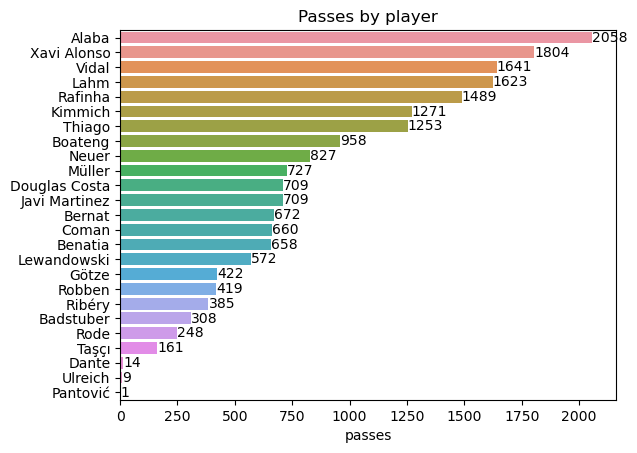

In [32]:
sns.barplot(x=most_passes.passes, y=most_passes.index)
plt.title('Passes by player')

for index, value in enumerate(most_passes.passes):
    plt.text(value, index, str(value), va='center');

plt.savefig('Passes by player.png', format='png', dpi=300)

In [17]:
passes_df.pass_type.unique()

array([nan], dtype=object)

In [18]:
passes_df[['player','pass_recipient','location','pass_end_location']]

player pass_recipient      location pass_end_location
7              Thiago          Alaba  [60.6, 42.6]      [39.7, 41.4]
8               Alaba           Lahm  [39.7, 41.4]      [50.4, 54.2]
9                Lahm    Lewandowski  [55.4, 54.6]      [70.1, 54.0]
10        Lewandowski           Lahm  [70.1, 54.0]      [57.2, 50.5]
11               Lahm  Javi Martinez  [55.4, 58.2]      [49.5, 75.4]
...               ...            ...           ...               ...
125976          Vidal  Douglas Costa  [83.2, 31.1]      [82.4, 41.4]
125977  Douglas Costa          Vidal  [79.7, 40.1]      [77.4, 33.9]
125978          Vidal         Thiago  [79.8, 35.7]      [74.0, 31.4]
125981  Douglas Costa        Boateng  [86.1, 41.3]      [90.3, 45.8]
125984          Neuer          Alaba  [14.4, 31.5]       [27.8, 7.1]

[19598 rows x 4 columns]

In [86]:
passes_df[['x1','y1']]=passes_df.location.apply(pd.Series)
passes_df[['x2','y2']]=passes_df.pass_end_location.apply(pd.Series)
passes_df=passes_df.drop(['location','pass_end_location'], axis=1)
passes_df=passes_df[['x1','y1','player','x2','y2','pass_recipient']]
passes_df

x1    y1         player    x2    y2 pass_recipient
7       60.6  42.6         Thiago  39.7  41.4          Alaba
8       39.7  41.4          Alaba  50.4  54.2           Lahm
9       55.4  54.6           Lahm  70.1  54.0    Lewandowski
10      70.1  54.0    Lewandowski  57.2  50.5           Lahm
11      55.4  58.2           Lahm  49.5  75.4  Javi Martinez
...      ...   ...            ...   ...   ...            ...
125976  83.2  31.1          Vidal  82.4  41.4  Douglas Costa
125977  79.7  40.1  Douglas Costa  77.4  33.9          Vidal
125978  79.8  35.7          Vidal  74.0  31.4         Thiago
125981  86.1  41.3  Douglas Costa  90.3  45.8        Boateng
125984  14.4  31.5          Neuer  27.8   7.1          Alaba

[19598 rows x 6 columns]

## playing style

In [20]:
avg_location=passes_df.groupby('player').agg({'x1':['mean'],'y1':['mean','count']})
avg_location.columns=['x','y','count']
avg_location

x          y  count
player                                    
Alaba          55.425705  20.804956   2058
Badstuber      46.635714  22.987662    308
Benatia        48.179787  43.457599    658
Bernat         63.937500  12.400744    672
Boateng        50.913361  42.585908    958
Coman          84.633030  44.366818    660
Dante          34.950000  20.042857     14
Douglas Costa  78.373907  30.556276    709
Götze          73.339573  42.139810    422
Javi Martinez  51.172214  48.754866    709
Kimmich        54.121715  52.215028   1271
Lahm           66.130499  61.141528   1623
Lewandowski    76.496503  36.837413    572
Müller         81.159560  52.449381    727
Neuer          14.674486  40.232285    827
Pantović       44.600000  12.300000      1
Rafinha        63.491538  50.117394   1489
Ribéry         78.170909  16.307532    385
Robben         81.336754  60.003819    419
Rode           66.556048  48.364919    248
Taşçı          46.136646  26.257764    161
Thiago         66.791700  28.324262   1253
Ulreich        12.866667  38.788889      9
Vidal          64.740098  38.925046   1641
Xavi Alonso    59.301718  38.167572   1804

In [21]:
passes_between = passes_df.reset_index()
passes_between

index    x1    y1         player    x2    y2 pass_recipient
0           7  60.6  42.6         Thiago  39.7  41.4          Alaba
1           8  39.7  41.4          Alaba  50.4  54.2           Lahm
2           9  55.4  54.6           Lahm  70.1  54.0    Lewandowski
3          10  70.1  54.0    Lewandowski  57.2  50.5           Lahm
4          11  55.4  58.2           Lahm  49.5  75.4  Javi Martinez
...       ...   ...   ...            ...   ...   ...            ...
19593  125976  83.2  31.1          Vidal  82.4  41.4  Douglas Costa
19594  125977  79.7  40.1  Douglas Costa  77.4  33.9          Vidal
19595  125978  79.8  35.7          Vidal  74.0  31.4         Thiago
19596  125981  86.1  41.3  Douglas Costa  90.3  45.8        Boateng
19597  125984  14.4  31.5          Neuer  27.8   7.1          Alaba

[19598 rows x 7 columns]

In [22]:
avg_location=passes_between.groupby('player').agg({'x1':['mean'],'y1':['mean','count']})
avg_location.columns=['x','y','count']
avg_location

x          y  count
player                                    
Alaba          55.425705  20.804956   2058
Badstuber      46.635714  22.987662    308
Benatia        48.179787  43.457599    658
Bernat         63.937500  12.400744    672
Boateng        50.913361  42.585908    958
Coman          84.633030  44.366818    660
Dante          34.950000  20.042857     14
Douglas Costa  78.373907  30.556276    709
Götze          73.339573  42.139810    422
Javi Martinez  51.172214  48.754866    709
Kimmich        54.121715  52.215028   1271
Lahm           66.130499  61.141528   1623
Lewandowski    76.496503  36.837413    572
Müller         81.159560  52.449381    727
Neuer          14.674486  40.232285    827
Pantović       44.600000  12.300000      1
Rafinha        63.491538  50.117394   1489
Ribéry         78.170909  16.307532    385
Robben         81.336754  60.003819    419
Rode           66.556048  48.364919    248
Taşçı          46.136646  26.257764    161
Thiago         66.791700  28.324262   1253
Ulreich        12.866667  38.788889      9
Vidal          64.740098  38.925046   1641
Xavi Alonso    59.301718  38.167572   1804

In [23]:
passes_df['id'] = range(1, len(passes_df) + 1)
passes_between_players = passes_df.groupby(['player','pass_recipient']).id.count()
passes_between_players=passes_between_players.reset_index()
passes_between_players

player pass_recipient   id
0          Alaba      Badstuber   46
1          Alaba        Benatia   61
2          Alaba         Bernat  179
3          Alaba        Boateng  134
4          Alaba          Coman   59
..           ...            ...  ...
460  Xavi Alonso         Ribéry   40
461  Xavi Alonso         Robben   35
462  Xavi Alonso           Rode   29
463  Xavi Alonso         Thiago  188
464  Xavi Alonso          Vidal  181

[465 rows x 3 columns]

## who each player gave more passes to

In [24]:
import dataframe_image as dfi
import plotly.graph_objects as go
import networkx as nx

In [25]:
most_passes_to_each_player = passes_between_players.groupby('player')['id'].idxmax()
most_passes_df = passes_between_players.loc[most_passes_to_each_player]
most_passes_df = most_passes_df.sort_values(by='id', ascending=False)
most_passes_df.rename(columns={'id':'number of passes'}, inplace=True)
most_passes_df=most_passes_df.reset_index()
most_passes_df=most_passes_df.drop(columns='index')
most_passes_df=most_passes_df.head(19)
df_styled=most_passes_df.style.background_gradient(cmap='RdYlGn')

df_styled.export_png('df_styled.png')
df_styled

In [26]:
# Extract players and pass recipients
players = list(set(most_passes_df['player'].tolist() + most_passes_df['pass_recipient'].tolist()))

# Create a list of node labels
node_labels = players

# Create source and target indices for the Sankey diagram
sources = [players.index(player) for player in most_passes_df['player']]
targets = [players.index(recipient) for recipient in most_passes_df['pass_recipient']]

# Define a list of colors for each link (change or expand as needed)
link_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']

# Create a Sankey diagram trace
sankey_trace = go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=most_passes_df['number of passes'],
        color=[link_colors[i % len(link_colors)] for i in range(len(most_passes_df))]  # Assign colors to links
    )
)

# Set layout
layout = go.Layout(title="Player Pass Distribution Sankey Diagram")

# Create figure
fig = go.Figure(data=[sankey_trace], layout=layout)

# Save the figure as an image
fig.write_image("sankey_diagram.png")  # Change the file format as needed (e.g., PNG, JPG, PDF)

# Display the Sankey diagram
fig.show()

## most common formation

In [33]:
eleven_df=all_events_df[(all_events_df['type'] == 'Starting XI') & (all_events_df['team']=='Bayern Munich')]
df=pd.DataFrame.from_records(eleven_df.tactics)
formation=df.formation.value_counts()
formation=pd.DataFrame(formation)
formation.reset_index(inplace=True)
formation.rename(columns={'index':'formation', 'formation':'times'}, inplace=True)
formation.formation=formation.formation.astype(str)
formation

formation  times
0      4141     14
1       433      6
2      4231      6
3      3511      4
4      3421      2
5       343      1
6       352      1

''

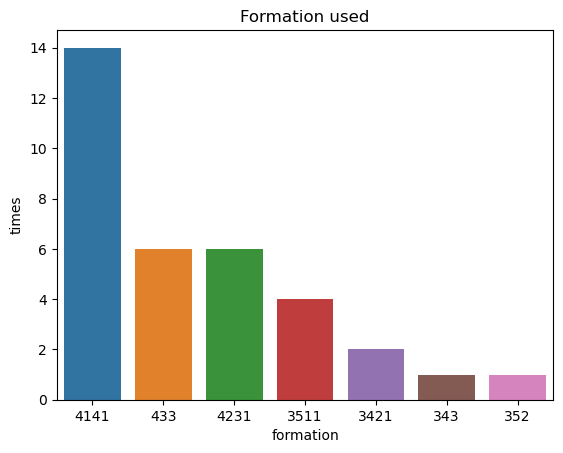

In [34]:
sns.barplot(x=formation.formation, y=formation.times)
plt.title('Formation used')
plt.savefig('Formation used.png', format='png', dpi=300)
;

In [35]:
df.lineup[0]

[{'player': {'id': 5570, 'name': 'Manuel Neuer'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'jersey_number': 1},
 {'player': {'id': 19295, 'name': 'Philipp Lahm'},
  'position': {'id': 2, 'name': 'Right Back'},
  'jersey_number': 21},
 {'player': {'id': 9399, 'name': 'Javier Martínez Aginaga'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'jersey_number': 8},
 {'player': {'id': 8220, 'name': 'David Olatukunbo Alaba'},
  'position': {'id': 5, 'name': 'Left Center Back'},
  'jersey_number': 27},
 {'player': {'id': 15651, 'name': 'Juan Bernat Velasco'},
  'position': {'id': 6, 'name': 'Left Back'},
  'jersey_number': 18},
 {'player': {'id': 20133, 'name': 'Xabier Alonso Olano'},
  'position': {'id': 10, 'name': 'Center Defensive Midfield'},
  'jersey_number': 14},
 {'player': {'id': 8227, 'name': 'Mario Götze'},
  'position': {'id': 13, 'name': 'Right Center Midfield'},
  'jersey_number': 19},
 {'player': {'id': 5208, 'name': 'Thiago Alcântara do Nascimento'},
  'positio

In [36]:
player_df = pd.DataFrame(df)

def extract_player_names(lineup):
    return [player['player']['name'] for player in lineup]

player_df['player_names'] = player_df['lineup'].apply(extract_player_names)
player_df.drop(columns='lineup', inplace=True)

In [37]:
player_df

formation                                       player_names
0         433  [Manuel Neuer, Philipp Lahm, Javier Martínez A...
1        3511  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
2        4231  [Manuel Neuer, Philipp Lahm, Medhi Amine El Mo...
3        4231  [Manuel Neuer, Philipp Lahm, Javier Martínez A...
4         343  [Manuel Neuer, Medhi Amine El Mouttaqi Benatia...
5        4231  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
6        4141  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
7        3421  [Manuel Neuer, Joshua Kimmich, Javier Martínez...
8        4141  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
9        4141  [Manuel Neuer, Philipp Lahm, Joshua Kimmich, M...
10       4231  [Manuel Neuer, Philipp Lahm, Joshua Kimmich, D...
11       4141  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
12       4141  [Manuel Neuer, Philipp Lahm, Joshua Kimmich, D...
13       4141  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
14       4141  [Manuel Neuer, Philipp Lahm, Joshua Kimmich, D...
15       4231  [Manuel Neuer, Philipp Lahm, Joshua Kimmich, H...
16       4141  [Manuel Neuer, Philipp Lahm, Joshua Kimmich, H...
17        433  [Manuel Neuer, Philipp Lahm, Jérôme Boateng, H...
18        352  [Manuel Neuer, Javier Martínez Aginaga, Jérôme...
19       4141  [Manuel Neuer, Philipp Lahm, Jérôme Boateng, H...
20        433  [Manuel Neuer, Philipp Lahm, Jérôme Boateng, M...
21        433  [Manuel Neuer, Philipp Lahm, Javier Martínez A...
22       4141  [Manuel Neuer, Philipp Lahm, Javier Martínez A...
23       3421  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
24       4141  [Manuel Neuer, Philipp Lahm, Javier Martínez A...
25       4141  [Manuel Neuer, Philipp Lahm, Jérôme Boateng, D...
26       4141  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
27       3511  [Manuel Neuer, Jérôme Boateng, Javier Martínez...
28       4231  [Manuel Neuer, Philipp Lahm, Javier Martínez A...
29        433  [Manuel Neuer, Philipp Lahm, Jérôme Boateng, D...
30        433  [Manuel Neuer, Márcio Rafael Ferreira de Souza...
31       3511  [Manuel Neuer, Philipp Lahm, David Olatukunbo ...
32       3511  [Manuel Neuer, Medhi Amine El Mouttaqi Benatia...
33       4141  [Manuel Neuer, Philipp Lahm, Jérôme Boateng, M...

In [38]:
player_df['player_names'] = player_df['player_names'].apply(', '.join)

In [39]:
formations_df=player_df
player_df

formation                                       player_names
0         433  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...
1        3511  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
2        4231  Manuel Neuer, Philipp Lahm, Medhi Amine El Mou...
3        4231  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...
4         343  Manuel Neuer, Medhi Amine El Mouttaqi Benatia,...
5        4231  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
6        4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
7        3421  Manuel Neuer, Joshua Kimmich, Javier Martínez ...
8        4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
9        4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Me...
10       4231  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Da...
11       4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
12       4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Da...
13       4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
14       4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Da...
15       4231  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Ho...
16       4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Ho...
17        433  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Ho...
18        352  Manuel Neuer, Javier Martínez Aginaga, Jérôme ...
19       4141  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Ho...
20        433  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Me...
21        433  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...
22       4141  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...
23       3421  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
24       4141  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...
25       4141  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Da...
26       4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
27       3511  Manuel Neuer, Jérôme Boateng, Javier Martínez ...
28       4231  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...
29        433  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Da...
30        433  Manuel Neuer, Márcio Rafael Ferreira de Souza,...
31       3511  Manuel Neuer, Philipp Lahm, David Olatukunbo A...
32       3511  Manuel Neuer, Medhi Amine El Mouttaqi Benatia,...
33       4141  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Me...

In [40]:
position=player_df.player_names.unique()
position

array(['Manuel Neuer, Philipp Lahm, Javier Martínez Aginaga, David Olatukunbo Alaba, Juan Bernat Velasco, Xabier Alonso Olano, Mario Götze, Thiago Alcântara do Nascimento, Thomas Müller, Franck Bilal Ribéry, Robert Lewandowski',
       'Manuel Neuer, Márcio Rafael Ferreira de Souza, Jérôme Boateng, David Olatukunbo Alaba, Philipp Lahm, Douglas Costa de Souza, Xabier Alonso Olano, Arturo Erasmo Vidal Pardo, Thiago Alcântara do Nascimento, Thomas Müller, Robert Lewandowski',
       'Manuel Neuer, Philipp Lahm, Medhi Amine El Mouttaqi Benatia, Jérôme Boateng, David Olatukunbo Alaba, Thiago Alcântara do Nascimento, Arturo Erasmo Vidal Pardo, Kingsley Coman, Mario Götze, Franck Bilal Ribéry, Robert Lewandowski',
       'Manuel Neuer, Philipp Lahm, Javier Martínez Aginaga, Joshua Kimmich, David Olatukunbo Alaba, Xabier Alonso Olano, Thiago Alcântara do Nascimento, Douglas Costa de Souza, Thomas Müller, Franck Bilal Ribéry, Robert Lewandowski',
       'Manuel Neuer, Medhi Amine El Mouttaqi Be

In [41]:
player_list=[]
for i in position:
    players=i.split(',')
    player_list.extend(players)
player_list
uniqueplayer=list(set(player_list))
uniqueplayer

[' Juan Bernat Velasco',
 ' Márcio Rafael Ferreira de Souza',
 ' Holger Badstuber',
 ' Franck Bilal Ribéry',
 ' Sebastian Rode',
 ' Mario Götze',
 ' Kingsley Coman',
 ' Serdar Taşçı',
 ' Philipp Lahm',
 ' Jérôme Boateng',
 ' David Olatukunbo Alaba',
 ' Douglas Costa de Souza',
 ' Thomas Müller',
 ' Joshua Kimmich',
 ' Javier Martínez Aginaga',
 ' Arjen Robben',
 ' Arturo Erasmo Vidal Pardo',
 ' Medhi Amine El Mouttaqi Benatia',
 ' Xabier Alonso Olano',
 ' Thiago Alcântara do Nascimento',
 ' Robert Lewandowski',
 'Manuel Neuer']

In [42]:
for player in uniqueplayer:
    player_df[player]=0

    for index,row in player_df.iterrows():
        player_list= row['player_names'].split(',')
        
        for player in player_list:
            player_df.at[index, player]= 1
player_df

formation                                       player_names  \
0         433  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...   
1        3511  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
2        4231  Manuel Neuer, Philipp Lahm, Medhi Amine El Mou...   
3        4231  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...   
4         343  Manuel Neuer, Medhi Amine El Mouttaqi Benatia,...   
5        4231  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
6        4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
7        3421  Manuel Neuer, Joshua Kimmich, Javier Martínez ...   
8        4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
9        4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Me...   
10       4231  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Da...   
11       4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
12       4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Da...   
13       4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
14       4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Da...   
15       4231  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Ho...   
16       4141  Manuel Neuer, Philipp Lahm, Joshua Kimmich, Ho...   
17        433  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Ho...   
18        352  Manuel Neuer, Javier Martínez Aginaga, Jérôme ...   
19       4141  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Ho...   
20        433  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Me...   
21        433  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...   
22       4141  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...   
23       3421  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
24       4141  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...   
25       4141  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Da...   
26       4141  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
27       3511  Manuel Neuer, Jérôme Boateng, Javier Martínez ...   
28       4231  Manuel Neuer, Philipp Lahm, Javier Martínez Ag...   
29        433  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Da...   
30        433  Manuel Neuer, Márcio Rafael Ferreira de Souza,...   
31       3511  Manuel Neuer, Philipp Lahm, David Olatukunbo A...   
32       3511  Manuel Neuer, Medhi Amine El Mouttaqi Benatia,...   
33       4141  Manuel Neuer, Philipp Lahm, Jérôme Boateng, Me...   

     Juan Bernat Velasco  Manuel Neuer   Philipp Lahm  \
0                      1             1              1   
1                      0             1              1   
2                      0             1              1   
3                      0             1              1   
4                      1             1              0   
5                      0             1              0   
6                      1             1              1   
7                      1             1              0   
8                      1             1              0   
9                      0             1              1   
10                     1             1              1   
11                     1             1              0   
12                     1             1              1   
13                     0             1              0   
14                     1             1              1   
15                     0             1              1   
16                     0             1              1   
17                     0             1              1   
18                     0             1              0   
19                     0             1              1   
20                     0             1              1   
21                     0             1              1   
22                     0             1              1   
23                     0             1              0   
24                     0             1              1   
25                     0             1              1   
26                     1             1              1   
27                     0   

In [43]:
player_df.drop(columns='player_names', inplace=True)

In [44]:
player_df

formation   Juan Bernat Velasco  Manuel Neuer   Philipp Lahm  \
0         433                     1             1              1   
1        3511                     0             1              1   
2        4231                     0             1              1   
3        4231                     0             1              1   
4         343                     1             1              0   
5        4231                     0             1              0   
6        4141                     1             1              1   
7        3421                     1             1              0   
8        4141                     1             1              0   
9        4141                     0             1              1   
10       4231                     1             1              1   
11       4141                     1             1              0   
12       4141                     1             1              1   
13       4141                     0             1              0   
14       4141                     1             1              1   
15       4231                     0             1              1   
16       4141                     0             1              1   
17        433                     0             1              1   
18        352                     0             1              0   
19       4141                     0             1              1   
20        433                     0             1              1   
21        433                     0             1              1   
22       4141                     0             1              1   
23       3421                     0             1              0   
24       4141                     0             1              1   
25       4141                     0             1              1   
26       4141                     1             1              1   
27       3511                     0             1              1   
28       4231                     0             1              1   
29        433                     1             1              1   
30        433                     1             1              0   
31       3511                     1             1              1   
32       3511                     0             1              1   
33       4141                     0             1              1   

     Javier Martínez Aginaga   David Olatukunbo Alaba   Xabier Alonso Olano  \
0                          1                        1                     1   
1                          0                        1                     1   
2                          0                        1                     0   
3                          1                        1                     1   
4                          0                        0                     0   
5                          0                        0                     0   
6                          0                        1                     0   
7                          1                        1                     1   
8                          0                        1                     1   
9                          0                        1                     1   
10                         0                        1                     1   
11                         0                        1                     0   
12                         0                        1                     1   
13                         0                        1                     0   
14                         0                        1                     0   
15                         0                        1                     1   
16                         0                        1                     1   
17                         0                        1                     1   
18                         1                        0                     1   
19                         1               

In [45]:
grouped_player_game_df = player_df.groupby('formation').sum().reset_index()

# Print the resulting DataFrame
grouped_player_game_df

formation   Juan Bernat Velasco  Manuel Neuer   Philipp Lahm  \
0        343                     1             1              0   
1        352                     0             1              0   
2        433                     3             6              5   
3       3421                     1             2              0   
4       3511                     1             4              4   
5       4141                     6            14             11   
6       4231                     1             6              5   

    Javier Martínez Aginaga   David Olatukunbo Alaba   Xabier Alonso Olano  \
0                         0                        0                     0   
1                         1                        0                     1   
2                         3                        4                     5   
3                         1                        2                     1   
4                         1                        4                     4   
5                         3                       12                     8   
6                         2                        5                     4   

    Mario Götze   Thiago Alcântara do Nascimento   Thomas Müller  ...  \
0             1                                0               1  ...   
1             0                                1               1  ...   
2             3                                3               5  ...   
3             1                                0               1  ...   
4             2                                3               4  ...   
5             2                                5              10  ...   
6             2                                4               4  ...   

    Jérôme Boateng   Douglas Costa de Souza   Arturo Erasmo Vidal Pardo  \
0                1                        0                           0   
1                1                        0                           1   
2                5                        3                           4   
3                1                        1                           2   
4                3                        4                           3   
5                5                       10                          10   
6                1                        5                           4   

    Medhi Amine El Mouttaqi Benatia   Kingsley Coman   Joshua Kimmich  \
0                                 1                1                1   
1                                 0                1                0   
2                                 2                4                1   
3                                 0                1                2   
4                                 1                0                0   
5                                 5               10                7   
6                                 2                3                4   

    Serdar Taşçı   Sebastian Rode   Arjen Robben   Holger Badstuber  
0              1                1              0                  0  
1              0                0              0                  1  
2              0                1              0                  1  
3              0                0              1                  0  
4              0                0              2                  0  
5              1                1              9                  2  
6              1                0              2                  1  

[7 rows x 23 columns]

In [46]:
transposed_df = grouped_player_game_df.transpose()

# Reset the index for a cleaner output
transposed_df = transposed_df.reset_index()
# Rename the columns
transposed_df.columns = transposed_df.iloc[0]
transposed_df = transposed_df[1:]
transposed_df.rename(columns={'formation':'player'}, inplace=True)

In [47]:
transposed_df=transposed_df[['player',4141,433,4231,3511,3421,343,352]]
sort_transponsed= transposed_df.sort_values(by=[4141,4231], ascending=False)
sort_transponsed

0                             player  4141  433  4231  3511  3421  343  352
2                       Manuel Neuer    14    6     6     4     2    1    1
11                Robert Lewandowski    13    4     6     3     2    0    1
5             David Olatukunbo Alaba    12    4     5     4     2    0    0
3                       Philipp Lahm    11    5     5     4     0    0    0
14            Douglas Costa de Souza    10    3     5     4     1    0    0
9                      Thomas Müller    10    5     4     4     1    1    1
15         Arturo Erasmo Vidal Pardo    10    4     4     3     2    0    1
17                    Kingsley Coman    10    4     3     0     1    1    1
21                      Arjen Robben     9    0     2     2     1    0    0
6                Xabier Alonso Olano     8    5     4     4     1    0    1
12   Márcio Rafael Ferreira de Souza     8    3     2     1     2    1    1
18                    Joshua Kimmich     7    1     4     0     2    1    0
1                Juan Bernat Velasco     6    3     1     1     1    1    0
8     Thiago Alcântara do Nascimento     5    3     4     3     0    0    1
16   Medhi Amine El Mouttaqi Benatia     5    2     2     1     0    1    0
13                    Jérôme Boateng     5    5     1     3     1    1    1
4            Javier Martínez Aginaga     3    3     2     1     1    0    1
7                        Mario Götze     2    3     2     2     1    1    0
10               Franck Bilal Ribéry     2    1     2     0     1    0    0
22                  Holger Badstuber     2    1     1     0     0    0    1
19                      Serdar Taşçı     1    0     1     0     0    1    0
20                    Sebastian Rode     1    1     0     0     0    1    0

In [48]:
sort_transponsed['Sum']=sort_transponsed.sum(axis=1)
sort_transponsed

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_8548\4106928203.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0                             player  4141  433  4231  3511  3421  343  352  \
2                       Manuel Neuer    14    6     6     4     2    1    1   
11                Robert Lewandowski    13    4     6     3     2    0    1   
5             David Olatukunbo Alaba    12    4     5     4     2    0    0   
3                       Philipp Lahm    11    5     5     4     0    0    0   
14            Douglas Costa de Souza    10    3     5     4     1    0    0   
9                      Thomas Müller    10    5     4     4     1    1    1   
15         Arturo Erasmo Vidal Pardo    10    4     4     3     2    0    1   
17                    Kingsley Coman    10    4     3     0     1    1    1   
21                      Arjen Robben     9    0     2     2     1    0    0   
6                Xabier Alonso Olano     8    5     4     4     1    0    1   
12   Márcio Rafael Ferreira de Souza     8    3     2     1     2    1    1   
18                    Joshua Kimmich     7    1     4     0     2    1    0   
1                Juan Bernat Velasco     6    3     1     1     1    1    0   
8     Thiago Alcântara do Nascimento     5    3     4     3     0    0    1   
16   Medhi Amine El Mouttaqi Benatia     5    2     2     1     0    1    0   
13                    Jérôme Boateng     5    5     1     3     1    1    1   
4            Javier Martínez Aginaga     3    3     2     1     1    0    1   
7                        Mario Götze     2    3     2     2     1    1    0   
10               Franck Bilal Ribéry     2    1     2     0     1    0    0   
22                  Holger Badstuber     2    1     1     0     0    0    1   
19                      Serdar Taşçı     1    0     1     0     0    1    0   
20                    Sebastian Rode     1    1     0     0     0    1    0   

0   Sum  
2    34  
11   29  
5    27  
3    25  
14   23  
9    26  
15   24  
17   20  
21   14  
6    23  
12   18  
18   15  
1    13  
8    16  
16   11  
13   17  
4    11  
7    11  
10    6  
22    5  
19    3  
20    3

In [45]:
sort_transponsed=sort_transponsed.sort_values(by=4141, ascending=False)

''

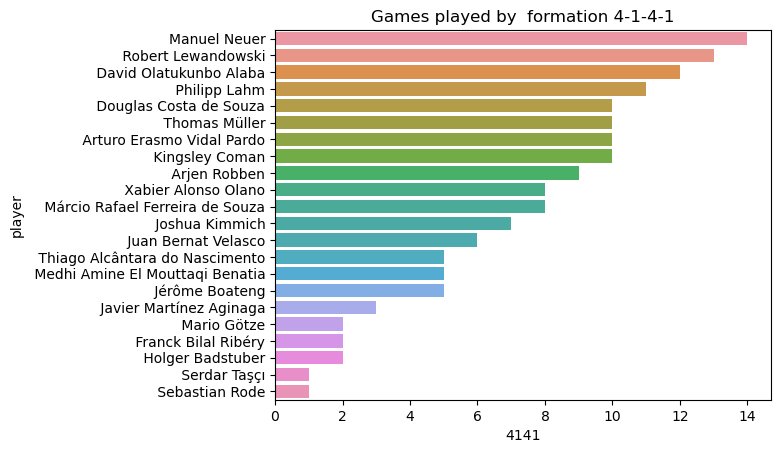

In [46]:
sns.barplot(x=sort_transponsed[4141], y=sort_transponsed.player)
plt.title('Games played by  formation 4-1-4-1')
plt.savefig('Games played by  formation 4-1-4-1.png', format='png', dpi=300)
;

## Passing net between players that played most games
during the season Guardiola never repeated in the league the same formation this analysis don't count champions league games

In [47]:
passes_df.head(3)

x1    y1  player    x2    y2 pass_recipient  id
7  60.6  42.6  Thiago  39.7  41.4          Alaba   1
8  39.7  41.4   Alaba  50.4  54.2           Lahm   2
9  55.4  54.6    Lahm  70.1  54.0    Lewandowski   3

In [48]:
avg_location.head(50)

x          y  count
player                                    
Alaba          55.425705  20.804956   2058
Badstuber      46.635714  22.987662    308
Benatia        48.179787  43.457599    658
Bernat         63.937500  12.400744    672
Boateng        50.913361  42.585908    958
Coman          84.633030  44.366818    660
Dante          34.950000  20.042857     14
Douglas Costa  78.373907  30.556276    709
Götze          73.339573  42.139810    422
Javi Martinez  51.172214  48.754866    709
Kimmich        54.121715  52.215028   1271
Lahm           66.130499  61.141528   1623
Lewandowski    76.496503  36.837413    572
Müller         81.159560  52.449381    727
Neuer          14.674486  40.232285    827
Pantović       44.600000  12.300000      1
Rafinha        63.491538  50.117394   1489
Ribéry         78.170909  16.307532    385
Robben         81.336754  60.003819    419
Rode           66.556048  48.364919    248
Taşçı          46.136646  26.257764    161
Thiago         66.791700  28.324262   1253
Ulreich        12.866667  38.788889      9
Vidal          64.740098  38.925046   1641
Xavi Alonso    59.301718  38.167572   1804

In [49]:
passes_between_players

player pass_recipient   id
0          Alaba      Badstuber   46
1          Alaba        Benatia   61
2          Alaba         Bernat  179
3          Alaba        Boateng  134
4          Alaba          Coman   59
..           ...            ...  ...
460  Xavi Alonso         Ribéry   40
461  Xavi Alonso         Robben   35
462  Xavi Alonso           Rode   29
463  Xavi Alonso         Thiago  188
464  Xavi Alonso          Vidal  181

[465 rows x 3 columns]

In [64]:
avg_location.index.unique()

Index(['Alaba', 'Badstuber', 'Benatia', 'Bernat', 'Boateng', 'Coman', 'Dante',
       'Douglas Costa', 'Götze', 'Javi Martinez', 'Kimmich', 'Lahm',
       'Lewandowski', 'Müller', 'Neuer', 'Pantović', 'Rafinha', 'Ribéry',
       'Robben', 'Rode', 'Taşçı', 'Thiago', 'Ulreich', 'Vidal', 'Xavi Alonso'],
      dtype='object', name='player')

In [65]:
sort_transponsed.player.unique()

array(['Manuel Neuer', ' Robert Lewandowski', ' David Olatukunbo Alaba',
       ' Philipp Lahm', ' Douglas Costa de Souza', ' Thomas Müller',
       ' Arturo Erasmo Vidal Pardo', ' Kingsley Coman', ' Arjen Robben',
       ' Xabier Alonso Olano', ' Márcio Rafael Ferreira de Souza',
       ' Joshua Kimmich', ' Juan Bernat Velasco',
       ' Thiago Alcântara do Nascimento',
       ' Medhi Amine El Mouttaqi Benatia', ' Jérôme Boateng',
       ' Javier Martínez Aginaga', ' Mario Götze', ' Franck Bilal Ribéry',
       ' Holger Badstuber', ' Serdar Taşçı', ' Sebastian Rode'],
      dtype=object)

In [97]:
#change players as you want to see as initial eleven to plot
initial_eleven=['Neuer',
                'Alaba','Kimmich','Bernat','Lahm',
                'Xavi Alonso','Müller','Thiago',
                'Douglas Costa','Lewandowski','Robben']

In [98]:
passes_between_eleven=passes_between_players[(passes_between_players.player.isin(initial_eleven)) & (passes_between_players.pass_recipient.isin(initial_eleven))]
passes_between_eleven.rename(columns={'id':'nuumber_passes'}, inplace=True)
passes_between_eleven

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_8548\3246853372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



player pass_recipient  nuumber_passes
2          Alaba         Bernat             179
5          Alaba  Douglas Costa             199
8          Alaba        Kimmich             146
9          Alaba           Lahm              68
10         Alaba    Lewandowski              68
..           ...            ...             ...
456  Xavi Alonso    Lewandowski              80
457  Xavi Alonso         Müller              74
458  Xavi Alonso          Neuer              35
461  Xavi Alonso         Robben              35
463  Xavi Alonso         Thiago             188

[109 rows x 3 columns]

In [99]:
avg_location_eleven=avg_location[avg_location.index.isin(initial_eleven)]
avg_location_eleven.reset_index(inplace=True)

In [100]:
avg_location_eleven

player          x          y  count
0           Alaba  55.425705  20.804956   2058
1          Bernat  63.937500  12.400744    672
2   Douglas Costa  78.373907  30.556276    709
3         Kimmich  54.121715  52.215028   1271
4            Lahm  66.130499  61.141528   1623
5     Lewandowski  76.496503  36.837413    572
6          Müller  81.159560  52.449381    727
7           Neuer  14.674486  40.232285    827
8          Robben  81.336754  60.003819    419
9          Thiago  66.791700  28.324262   1253
10    Xavi Alonso  59.301718  38.167572   1804

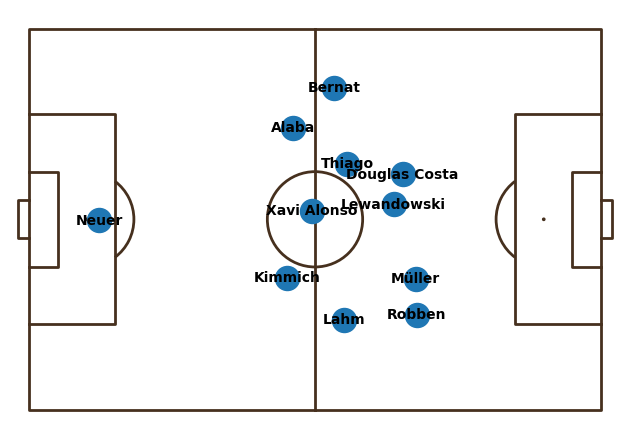

In [101]:
pitch=Pitch(pitch_type='statsbomb',line_color='#46301E', goal_type='box')

fig,ax=pitch.draw()
scatter=pitch.scatter(x=avg_location_eleven.x,y=avg_location_eleven.y,s=300, ax=ax)

#annotating player name
for i, row in avg_location_eleven.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y),
                   c='black', va='center', ha='center', weight = "bold", size=10, ax=ax, zorder = 4)


In [75]:
passes_between_eleven

player pass_recipient  nuumber_passes
2          Alaba         Bernat             179
5          Alaba  Douglas Costa             199
8          Alaba        Kimmich             146
9          Alaba           Lahm              68
10         Alaba    Lewandowski              68
..           ...            ...             ...
456  Xavi Alonso    Lewandowski              80
457  Xavi Alonso         Müller              74
458  Xavi Alonso          Neuer              35
461  Xavi Alonso         Robben              35
463  Xavi Alonso         Thiago             188

[109 rows x 3 columns]

In [76]:
passes_between_eleven=passes_between_eleven.merge(avg_location_eleven, left_on='player',right_on='player')
passes_between_eleven=passes_between_eleven.merge(avg_location_eleven, left_on='pass_recipient', right_on='player',
                                                 suffixes=['','_end'])
passes_between_eleven.drop(columns=['count','player_end','count_end'],inplace=True)
passes_between_eleven

player pass_recipient  nuumber_passes          x          y  \
0            Alaba         Bernat             179  55.425705  20.804956   
1    Douglas Costa         Bernat              29  78.373907  30.556276   
2          Kimmich         Bernat              37  54.121715  52.215028   
3             Lahm         Bernat              12  66.130499  61.141528   
4      Lewandowski         Bernat              18  76.496503  36.837413   
..             ...            ...             ...        ...        ...   
104         Müller          Alaba              17  81.159560  52.449381   
105          Neuer          Alaba             137  14.674486  40.232285   
106         Robben          Alaba              20  81.336754  60.003819   
107         Thiago          Alaba             118  66.791700  28.324262   
108    Xavi Alonso          Alaba             245  59.301718  38.167572   

         x_end      y_end  
0    63.937500  12.400744  
1    63.937500  12.400744  
2    63.937500  12.400744  
3    63.937500  12.400744  
4    63.937500  12.400744  
..         ...        ...  
104  55.425705  20.804956  
105  55.425705  20.804956  
106  55.425705  20.804956  
107  55.425705  20.804956  
108  55.425705  20.804956  

[109 rows x 7 columns]

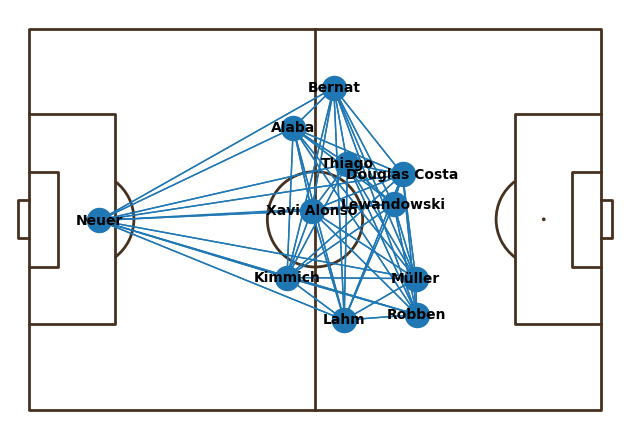

In [77]:
pitch=Pitch(pitch_type='statsbomb',line_color='#46301E', goal_type='box')

fig,ax=pitch.draw()
scatter=pitch.scatter(x=avg_location_eleven.x,y=avg_location_eleven.y,s=300, ax=ax)

#annotating player name
for i, row in avg_location_eleven.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y),
                   c='black', va='center', ha='center', weight = "bold", size=10, ax=ax, zorder = 4)
    
lines=pitch.lines(passes_between_eleven.x,passes_between_eleven.y,
                 passes_between_eleven.x_end,passes_between_eleven.y_end, ax=ax, linewidth=1)

In [78]:
max_line_width=6
max_marker_size=3000
passes_between_eleven['width'] = (passes_between_eleven['nuumber_passes']/passes_between_eleven['nuumber_passes'].max()*max_line_width)

In [79]:
from matplotlib.colors import to_rgba
min_transparency=0.3
color=np.array(to_rgba('#7375bd'))
color=np.tile(color,(len(passes_between_eleven),1))
c_trasnparency=passes_between_eleven['nuumber_passes'] / passes_between_eleven['nuumber_passes'].max()
c_trasnparency=(c_trasnparency*(1-min_transparency))+min_transparency
color[:,3]=c_trasnparency

''

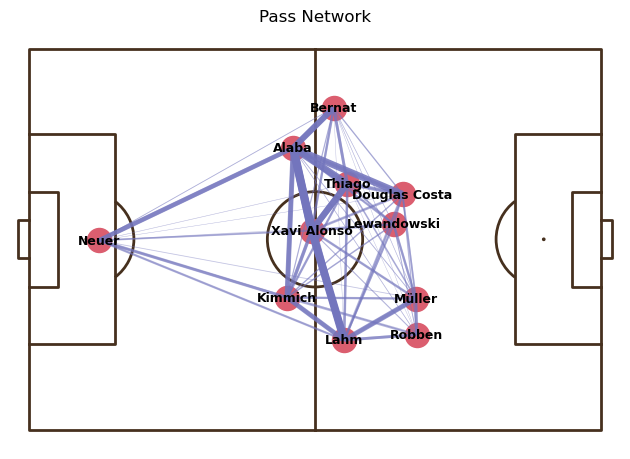

In [80]:
pitch=Pitch(pitch_type='statsbomb',line_color='#46301E', goal_type='box')

fig,ax=pitch.draw()
scatter=pitch.scatter(x=avg_location_eleven.x,y=avg_location_eleven.y,s=300, ax=ax, color='#db5e6f')

#annotating player name
for i, row in avg_location_eleven.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y),
                   c='black', va='center', ha='center', weight = "bold", size=9, ax=ax, zorder = 4)
    
lines=pitch.lines(passes_between_eleven.x,passes_between_eleven.y,
                 passes_between_eleven.x_end,passes_between_eleven.y_end, ax=ax,
                  lw=passes_between_eleven['width'], color=color)
plt.title('Pass Network')

plt.title('Pass Network')
plt.savefig('Pass Network.png', format='png', dpi=300)
;

In [81]:
avg_location.index.unique()

Index(['Alaba', 'Badstuber', 'Benatia', 'Bernat', 'Boateng', 'Coman', 'Dante',
       'Douglas Costa', 'Götze', 'Javi Martinez', 'Kimmich', 'Lahm',
       'Lewandowski', 'Müller', 'Neuer', 'Pantović', 'Rafinha', 'Ribéry',
       'Robben', 'Rode', 'Taşçı', 'Thiago', 'Ulreich', 'Vidal', 'Xavi Alonso'],
      dtype='object', name='player')

In [87]:
Neuer_passes=passes_df[passes_df.player=='Neuer']
Neuer_passes

x1    y1 player    x2    y2 pass_recipient
53       9.2  32.1  Neuer  28.5  49.7  Javi Martinez
109     15.6  57.4  Neuer  31.1  57.8  Javi Martinez
291     17.5  45.5  Neuer  30.4  52.3           Lahm
307     20.5  40.0  Neuer  28.2  34.9    Xavi Alonso
341     30.8  23.3  Neuer  51.4  57.6  Javi Martinez
...      ...   ...    ...   ...   ...            ...
125815   3.5  43.1  Neuer  18.0  36.3         Thiago
125890   9.8  47.7  Neuer   7.2  74.5        Boateng
125910  26.9  21.1  Neuer  51.2  19.0         Thiago
125949   7.9  35.2  Neuer  21.1  18.0          Alaba
125984  14.4  31.5  Neuer  27.8   7.1          Alaba

[827 rows x 6 columns]

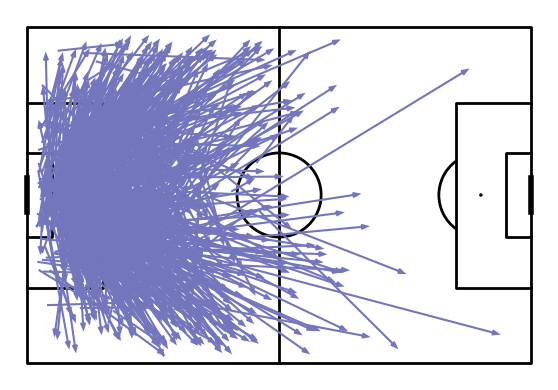

In [88]:
x=Neuer_passes.x1
x2=Neuer_passes.x2
y=Neuer_passes.y1
y2=Neuer_passes.y2
pitch=Pitch(pitch_type='statsbomb',line_color='black')

fig, ax=pitch.draw(figsize=(8,4))

passes=pitch.arrows(x,y,x2,y2, ax=ax, color='#7375bd',width=1.5,headlength=4 )

# Neuer end pass map percentage
### where and who he passed most the ball

In [89]:
import matplotlib.patheffects as path_effects

In [90]:
# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

''

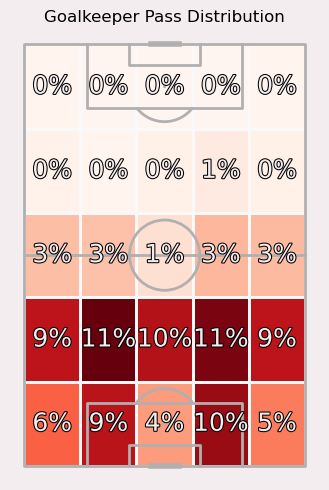

In [91]:
x=Neuer_passes.x2
y=Neuer_passes.y2

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4, 5))
fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(x,y, statistic='count', bins=(5,5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

pass_recipient_counts = Neuer_passes['pass_recipient'].value_counts().sort_values(ascending=False).head(10)
pass_recipient_counts=pd.DataFrame(pass_recipient_counts)
pass_recipient_counts.style.background_gradient(cmap='Reds')

plt.title('Goalkeeper Pass Distribution')
plt.savefig('Goalkeeper Pass Distribution.png', format='png', dpi=300)
;

# Xavi Alonso

''

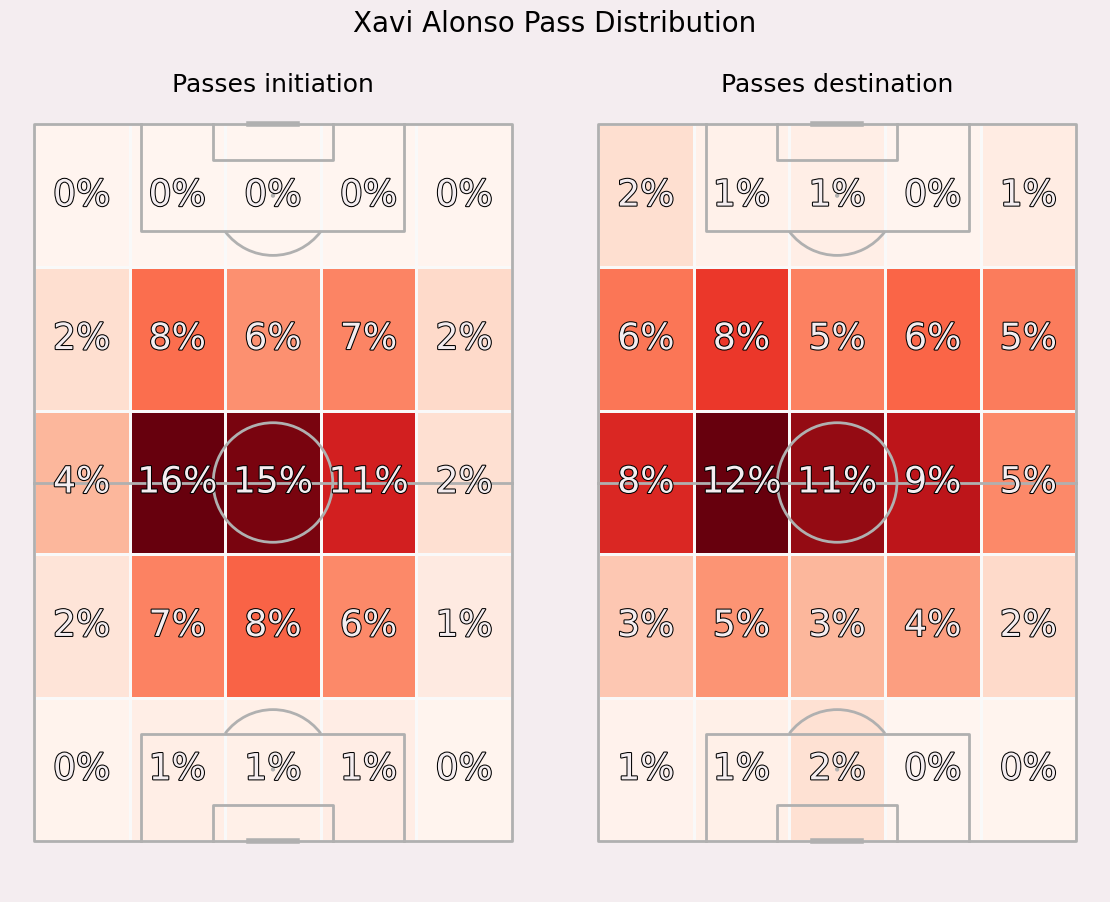

In [69]:
xavi_passes=passes_df[passes_df.player=='Xavi Alonso']


x=xavi_passes.x1
y=xavi_passes.y1

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, axs = pitch.grid(ncols=2, nrows=1,grid_height=0.85, title_height=0.02, axis=False,
                     endnote_height=0.02, title_space=0.04, endnote_space=0.01)


fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(x,y, statistic='count', bins=(5,5), normalize=True)
pitch.heatmap(bin_statistic,ax=axs['pitch'][0], cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=26,
                            ax=axs['pitch'][0], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
ax=axs['pitch'][0].set_title('Passes initiation', fontsize=18)


x=xavi_passes.x2
y=xavi_passes.y2

fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(x,y, statistic='count', bins=(5,5), normalize=True)
pitch.heatmap(bin_statistic, ax=axs['pitch'][1], cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=26,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
ax=axs['pitch'][1].set_title('Passes destination', fontsize=18)

pass_recipient_xavi = xavi_passes['pass_recipient'].value_counts().sort_values(ascending=False).head(10)
pass_recipient_xavi=pd.DataFrame(pass_recipient_xavi)
pass_recipient_xavi.style.background_gradient(cmap='Reds')
axs['title'].text(0.5,3, "Xavi Alonso Pass Distribution", ha='center', va='top', fontsize=20)
plt.savefig('Xavi Alonso Pass Distribution.png', format='png', dpi=300)
;

# Thiago Alcantara

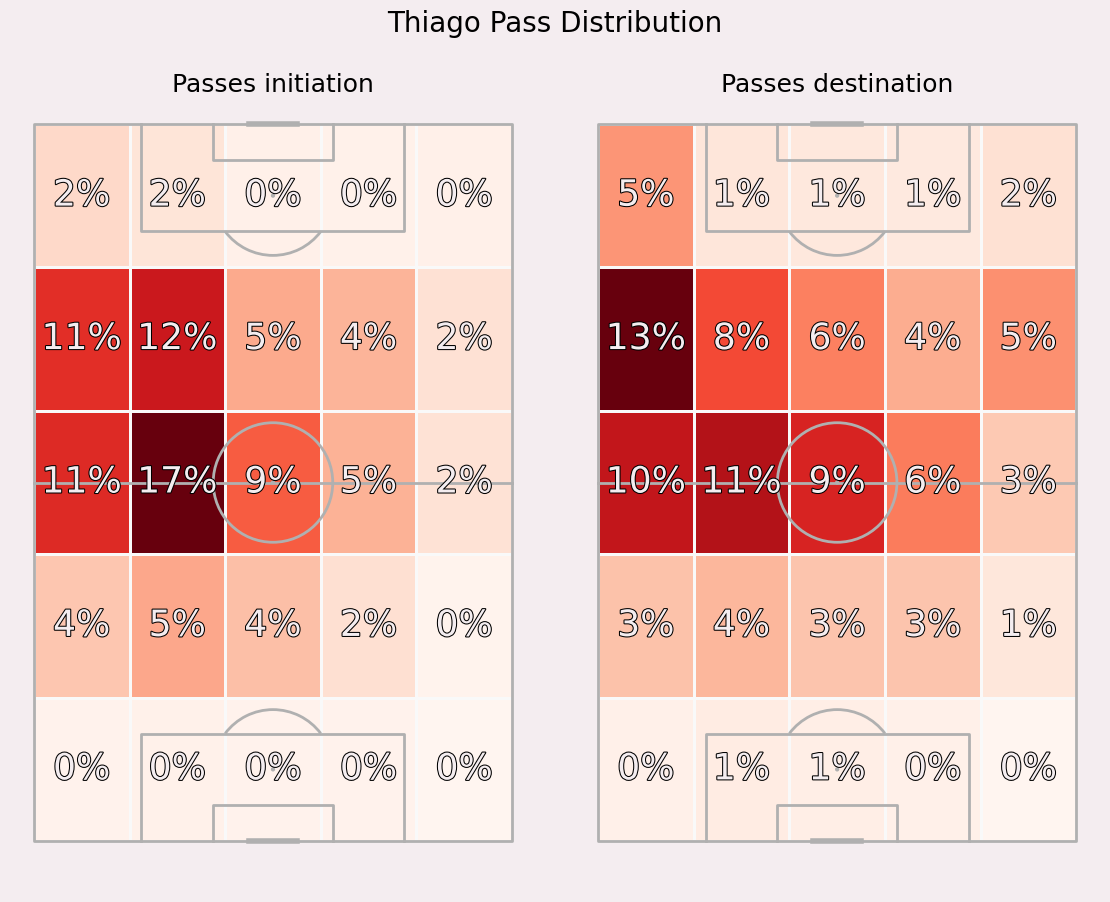

In [70]:
Thiago_passes=passes_df[passes_df.player=='Thiago']


x=Thiago_passes.x1
y=Thiago_passes.y1

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, axs = pitch.grid(ncols=2, nrows=1,grid_height=0.85, title_height=0.02, axis=False,
                     endnote_height=0.02, title_space=0.04, endnote_space=0.01)


fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(x,y, statistic='count', bins=(5,5), normalize=True)
pitch.heatmap(bin_statistic,ax=axs['pitch'][0], cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=26,
                            ax=axs['pitch'][0], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
ax=axs['pitch'][0].set_title('Passes initiation', fontsize=18)


x=Thiago_passes.x2
y=Thiago_passes.y2

fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(x,y, statistic='count', bins=(5,5), normalize=True)
pitch.heatmap(bin_statistic, ax=axs['pitch'][1], cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=26,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
ax=axs['pitch'][1].set_title('Passes destination', fontsize=18)

pass_recipient_Thiago = Thiago_passes['pass_recipient'].value_counts().sort_values(ascending=False).head(10)
pass_recipient_Thiago=pd.DataFrame(pass_recipient_Thiago)
pass_recipient_Thiago.style.background_gradient(cmap='Reds')

axs['title'].text(0.5,3, "Thiago Pass Distribution", ha='center', va='top', fontsize=20)
plt.savefig('Thiago Pass Distribution.png', format='png', dpi=300)

## players heat map

In [71]:
heat_map_df=all_events_df
heat_map_df = heat_map_df.dropna(subset=['player'])
heat_map_df[['x','y']]=heat_map_df.location.apply(pd.Series)
heat_map_df=heat_map_df[['player','x','y']]

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\2966044865.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\2966044865.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
names=['Lewandowski', 'Thiago', 'Alaba', 'Lahm', 'Javi Martinez',
       'Xavi Alonso', 'Bernat', 'Ribéry', 'Müller', 'Neuer', 'Götze',
       'Douglas Costa', 'Vidal', 'Boateng', 'Rafinha', 'Coman', 'Benatia',
       'Rode', 'Kimmich','Robben', 'Badstuber',
       'Dante']
names

['Lewandowski',
 'Thiago',
 'Alaba',
 'Lahm',
 'Javi Martinez',
 'Xavi Alonso',
 'Bernat',
 'Ribéry',
 'Müller',
 'Neuer',
 'Götze',
 'Douglas Costa',
 'Vidal',
 'Boateng',
 'Rafinha',
 'Coman',
 'Benatia',
 'Rode',
 'Kimmich',
 'Robben',
 'Badstuber',
 'Dante']

C:\Users\Interventoria\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Interventoria\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Interventoria\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Interventoria\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:172: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Interventoria\anaconda3\lib\site-pa

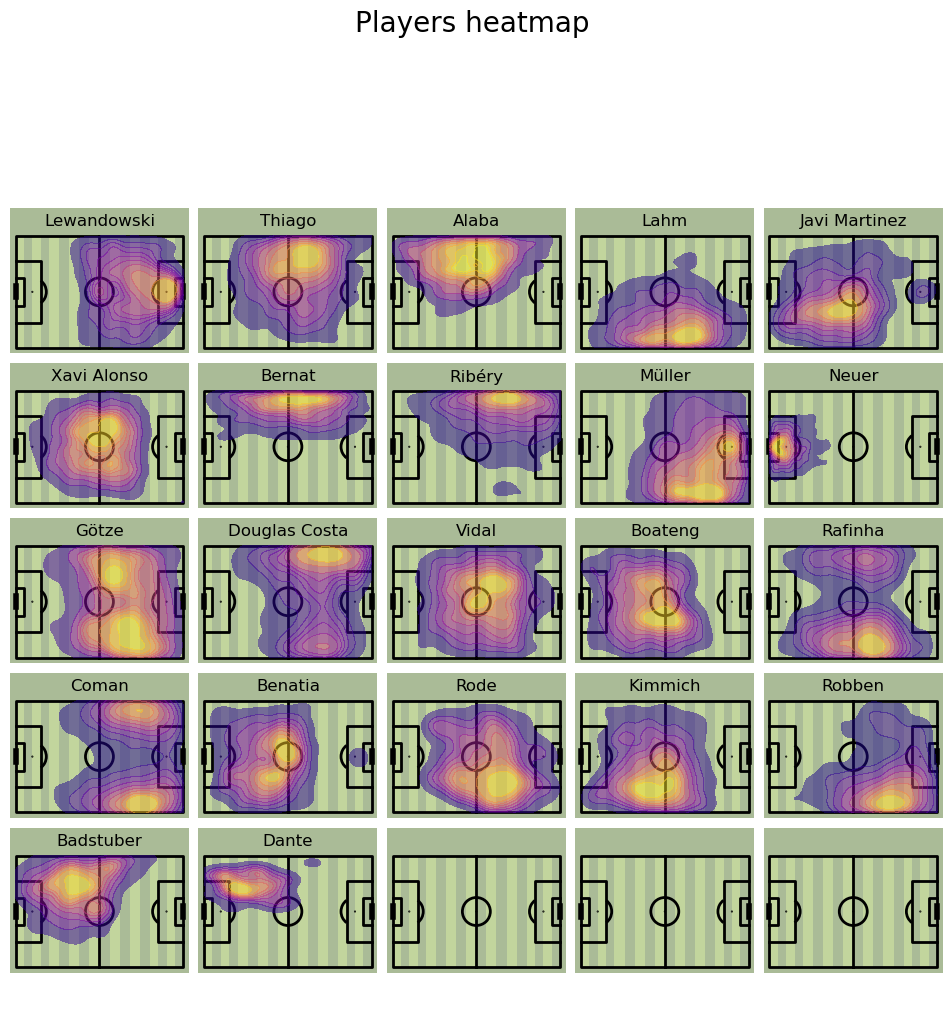

In [73]:
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True,pad_top=20)                          
                                            

fig, axs = pitch.grid(ncols = 5, nrows = 5, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=12)
    
    player_df = heat_map_df.loc[heat_map_df["player"] == name]
    x=player_df.x
    y=player_df.y
    
    #heatmap
    kde = pitch.kdeplot(x,y, ax=ax,
        fill=False,shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',)
    
axs['title'].text(0.5,3, "Players heatmap ", ha='center', va='top', fontsize=20)
plt.savefig('Players heatmap.png', format='png', dpi=200) 

# Shooting

In [74]:
all_events_df.columns

Index(['team', 'ball_receipt_outcome', 'location', 'pass_end_location',
       'pass_recipient', 'pass_type', 'player', 'possession_team', 'minute',
       'second', 'type', 'pass_outcome', 'shot_end_location', 'shot_body_part',
       'substitution_replacement', 'tactics', 'shot_outcome', 'match_id',
       'shot_type', 'goalkeeper_shot_saved_off_target', 'shot_open_goal'],
      dtype='object')

In [92]:
shot_df=all_events_df[all_events_df.type=='Shot']
shot_df=shot_df[['player','location', 'team', 'possession_team',
                 'shot_end_location', 'shot_outcome', 'minute',
                 'match_id', 'shot_type', 'goalkeeper_shot_saved_off_target', 'shot_open_goal','shot_body_part']]
shot_df

player       location           team possession_team  \
3439      Lewandowski  [109.4, 44.0]  Bayern Munich   Bayern Munich   
3440            Götze  [114.3, 35.3]  Bayern Munich   Bayern Munich   
3441      Lewandowski   [95.2, 40.6]  Bayern Munich   Bayern Munich   
3442            Götze   [99.4, 46.5]  Bayern Munich   Bayern Munich   
3443           Ribéry  [102.5, 39.0]  Bayern Munich   Bayern Munich   
...               ...            ...            ...             ...   
128535         Müller  [113.6, 30.4]  Bayern Munich   Bayern Munich   
128536          Alaba   [99.2, 25.5]  Bayern Munich   Bayern Munich   
128537  Douglas Costa  [106.5, 64.6]  Bayern Munich   Bayern Munich   
128538  Douglas Costa  [100.7, 57.0]  Bayern Munich   Bayern Munich   
128539        Boateng   [91.5, 46.0]  Bayern Munich   Bayern Munich   

         shot_end_location shot_outcome  minute  match_id  shot_type  \
3439    [120.0, 46.0, 0.9]        Off T       5   3890505  Open Play   
3440    [120.0, 61.3, 0.2]        Off T      14   3890505  Open Play   
3441    [120.0, 49.1, 5.8]        Off T      16   3890505  Open Play   
3442    [113.4, 43.0, 0.3]        Saved      19   3890505  Open Play   
3443    [120.0, 38.1, 1.9]         Goal      19   3890505  Open Play   
...                    ...          ...     ...       ...        ...   
128535  [120.0, 38.9, 0.2]         Goal      72   3890259  Open Play   
128536  [117.7, 36.8, 2.2]        Saved      77   3890259  Open Play   
128537  [120.0, 37.3, 3.6]        Off T      83   3890259  Open Play   
128538  [120.0, 37.0, 0.7]         Goal      86   3890259  Open Play   
128539  [120.0, 46.7, 5.1]        Off T      89   3890259  Open Play   

       goalkeeper_shot_saved_off_target shot_open_goal shot_body_part  
3439                                NaN            NaN           Head  
3440                                NaN            NaN     Right Foot  
3441                                NaN            NaN     Right Foot  
3442                                NaN            NaN     Right Foot  
3443                                NaN            NaN     Right Foot  
...                                 ...            ...            ...  
128535                              NaN            NaN      Left Foot  
128536                              NaN            NaN      Left Foot  
128537                              NaN            NaN      Left Foot  
128538                              NaN            NaN      Left Foot  
128539                              NaN            NaN     Right Foot  

[622 rows x 12 columns]

### Shots by player

In [93]:
shots_player=shot_df['player'].value_counts()
shots_player=pd.DataFrame(shots_player)
shots_player.reset_index(inplace=True)
shots_player.rename(columns={'player':'shots', 'index':'player'}, inplace=True)
shots_player.style.background_gradient(cmap='RdYlGn')

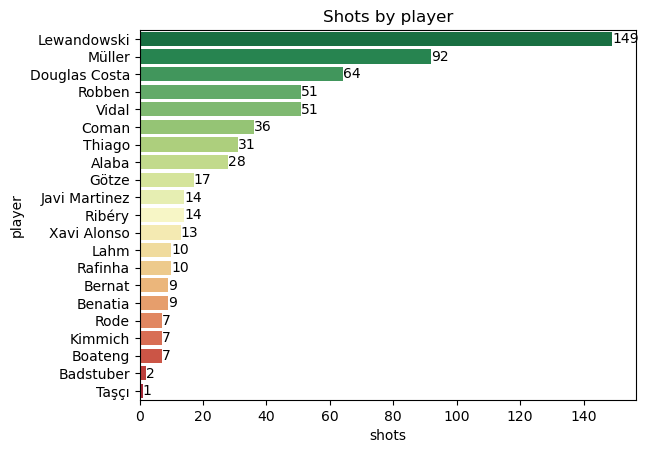

In [94]:
sns.barplot(x=shots_player.shots, y=shots_player.player,palette='RdYlGn_r')
for index, value in enumerate(shots_player.shots):
    plt.text(value, index, str(value), va='center');


plt.title('Shots by player')
plt.savefig('Shots by player.png', format='png', dpi=300)

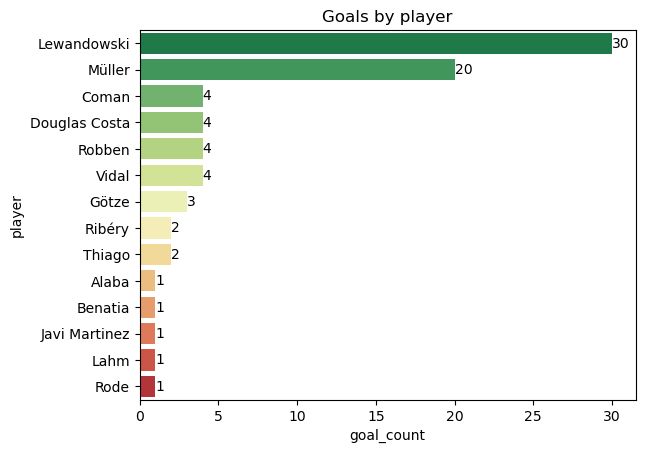

In [95]:
goals_df= shot_df[shot_df['shot_outcome'] == 'Goal'].groupby('player').size().reset_index(name='goal_count')
goals_df=goals_df.sort_values(by='goal_count', ascending=False)


sns.barplot(x=goals_df.goal_count,y=goals_df.player,palette='RdYlGn_r')
for index, value in enumerate(goals_df.goal_count):
    plt.text(value, index, str(value), va='center')  

plt.title('Goals by player')
plt.savefig('Goals by player.png', format='png', dpi=300)

In [96]:
goals=shot_df[shot_df.shot_outcome=='Goal']
goals

player       location           team possession_team  \
3443           Ribéry  [102.5, 39.0]  Bayern Munich   Bayern Munich   
7147      Lewandowski  [117.0, 41.2]  Bayern Munich   Bayern Munich   
7149           Müller  [108.0, 40.0]  Bayern Munich   Bayern Munich   
10881     Lewandowski  [105.9, 42.1]  Bayern Munich   Bayern Munich   
10889           Götze  [113.2, 48.3]  Bayern Munich   Bayern Munich   
...               ...            ...            ...             ...   
128518        Benatia  [114.3, 42.5]  Bayern Munich   Bayern Munich   
128526    Lewandowski  [107.3, 43.4]  Bayern Munich   Bayern Munich   
128532         Müller  [115.6, 42.8]  Bayern Munich   Bayern Munich   
128535         Müller  [113.6, 30.4]  Bayern Munich   Bayern Munich   
128538  Douglas Costa  [100.7, 57.0]  Bayern Munich   Bayern Munich   

         shot_end_location shot_outcome  minute  match_id  shot_type  \
3443    [120.0, 38.1, 1.9]         Goal      19   3890505  Open Play   
7147    [120.0, 41.8, 1.3]         Goal      76   3890287  Open Play   
7149    [120.0, 37.4, 1.4]         Goal      89   3890287    Penalty   
10881   [120.0, 38.8, 1.1]         Goal      11   3890559  Open Play   
10889   [120.0, 38.0, 0.9]         Goal      27   3890559  Open Play   
...                    ...          ...     ...       ...        ...   
128518  [120.0, 43.3, 1.6]         Goal      26   3890259  Open Play   
128526  [120.0, 43.6, 0.0]         Goal      52   3890259  Open Play   
128532  [120.0, 40.1, 0.9]         Goal      68   3890259  Open Play   
128535  [120.0, 38.9, 0.2]         Goal      72   3890259  Open Play   
128538  [120.0, 37.0, 0.7]         Goal      86   3890259  Open Play   

       goalkeeper_shot_saved_off_target shot_open_goal shot_body_part  
3443                                NaN            NaN     Right Foot  
7147                                NaN           True     Right Foot  
7149                                NaN            NaN     Right Foot  
10881                               NaN            NaN     Right Foot  
10889                               NaN            NaN     Right Foot  
...                                 ...            ...            ...  
128518                              NaN            NaN           Head  
128526                              NaN            NaN     Right Foot  
128532                              NaN            NaN           Head  
128535                              NaN            NaN      Left Foot  
128538                              NaN            NaN      Left Foot  

[78 rows x 12 columns]

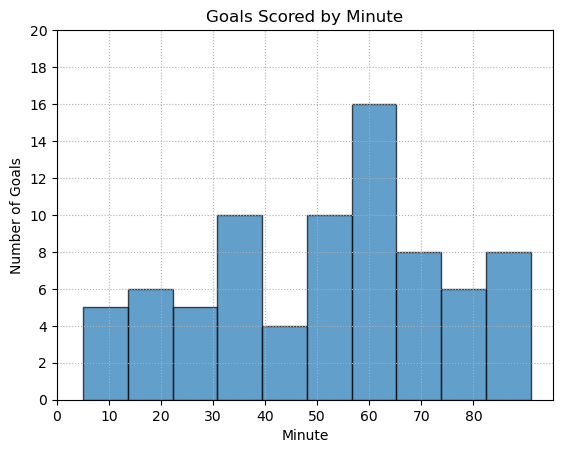

In [97]:
plt.hist(goals.minute, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.title('Goals Scored by Minute')
x_ticks = [15, 30, 45, 60, 75, 90]
plt.xticks(range(0,90,10))
plt.yticks(range(0, 22, 2))

plt.grid(True, linestyle='dotted')

#plt.title('Goals by player')
plt.savefig('Goals Scored by Minute.png', format='png', dpi=300)

plt.show()

<Figure size 1000x600 with 0 Axes>

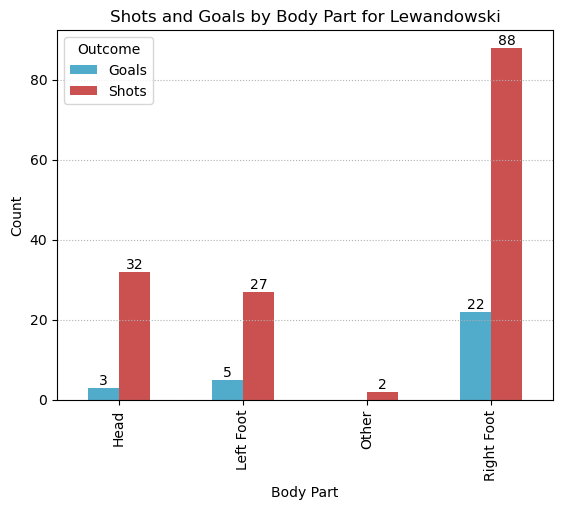

In [98]:
Lewandowski=shot_df[shot_df.player=='Lewandowski']

Lewandowskigoals=Lewandowski[Lewandowski.shot_outcome=='Goal']
Lewandowskigoals=Lewandowskigoals.shot_body_part.value_counts()
Lewandowskigoals=pd.DataFrame(Lewandowskigoals)


Lewandowskishots=Lewandowski.shot_body_part.value_counts()
Lewandowskishots=pd.DataFrame(Lewandowskishots)
Lewandowskishots

merged_df = Lewandowskigoals.join(Lewandowskishots, how='outer', lsuffix='_goals', rsuffix='_shots')

plt.figure(figsize=(10, 6))
ax=merged_df.plot(kind='bar', color=['#2596be', '#be2525'], alpha=0.8)
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.title('Shots and Goals by Body Part for Lewandowski')
plt.legend(title='Outcome', labels=['Goals', 'Shots'])
plt.grid(True, linestyle='dotted', axis='y')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')
        
#plt.title('Goals by player')
plt.savefig('Shots and Goals by Body Part for Lewandowski.png', format='png', dpi=300)

In [99]:
shots_location=shot_df[['player','location','shot_end_location','shot_outcome','shot_type']]
shots_location=shots_location[shots_location.shot_type=='Open Play']
shots_location.drop
shots_location[['x','y']]=shots_location.location.apply(pd.Series)
shots_location[['x_end','y_end','z_end']]=shots_location.shot_end_location.apply(pd.Series)
shots_location=shots_location[['player','shot_outcome', 'shot_type',
       'x', 'y', 'x_end', 'y_end', 'z_end']]

In [100]:
lewandowski_shots=shots_location[shots_location.player=='Lewandowski']

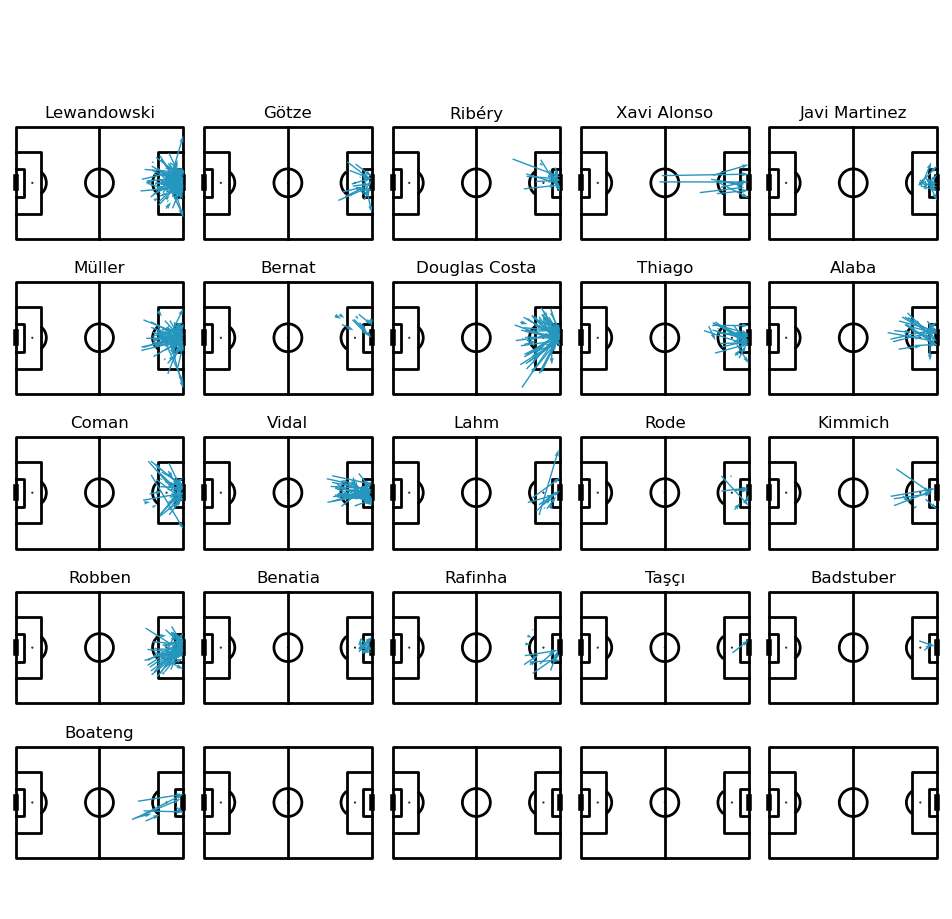

In [101]:
names=(shots_location.player.unique())

pitch=Pitch(pitch_type='statsbomb', line_zorder=2, line_color='black')
                                            
                                            
#draw 5x5 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 5, nrows = 5, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=12)
    
    player_df = shots_location.loc[shots_location["player"] == name]
    #Arrows
    pitch.arrows(player_df.x, player_df.y, player_df.x_end, player_df.y_end, ax=ax, width=1, color ='#2596be')
    

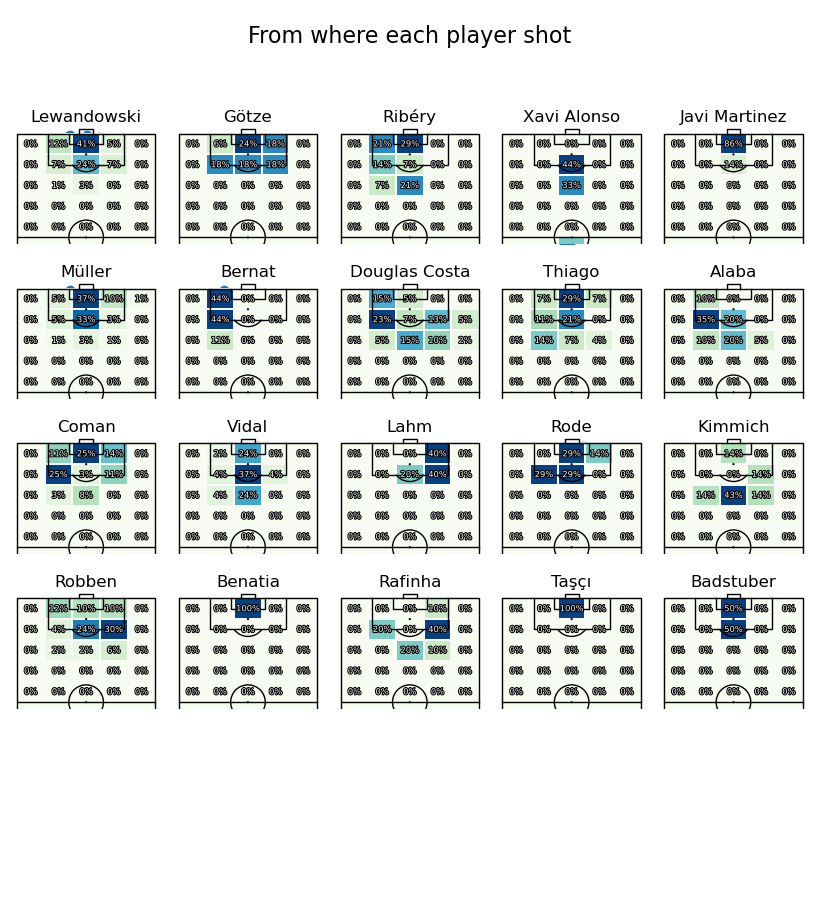

In [102]:
pitch = VerticalPitch(pitch_type='statsbomb',line_color='black', pad_top=20,
                      line_zorder=2, goal_type='box',linewidth=1, half=True)
fig, axs = pitch.grid(ncols = 5, nrows = 5, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(40, 130, name,
            ha='center', va='center', fontsize=12)
    
    player_df = shots_location.loc[shots_location["player"] == name]
    #plot
    pitch.scatter(player_df.x, player_df.y,ax=ax)
    bin_statistic = pitch.bin_statistic(player_df.x,player_df.y, statistic='count', bins=(10, 5), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, cmap='GnBu', edgecolor='#f9f9f9',linewidth=0.2)
    labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=6,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()    
    
axs['title'].text(0.5, 0.5, "From where each player shot", ha='center', va='center', fontsize=16)
plt.savefig('Shots position by player Bayern Munich.png', format='png', dpi=300)

## Penalties

In [125]:
#inverting y, x and z is neccesary in order to plot

penalty_location=shot_df[['player','location','shot_end_location','shot_outcome','shot_type']]
penalty_location=penalty_location[penalty_location.shot_type=='Penalty']
penalty_location.drop
penalty_location[['x','y']]=penalty_location.location.apply(pd.Series)
penalty_location[['z_end','x_end','y_end']]=penalty_location.shot_end_location.apply(pd.Series)
penalty_location=penalty_location[['player','shot_outcome', 'shot_type',
       'x_end', 'y_end', 'z_end']]
penalty_location

player shot_outcome shot_type  x_end  y_end  z_end
7149         Müller         Goal   Penalty   37.4    1.4  120.0
14172   Lewandowski         Goal   Penalty   42.5    0.2  120.0
68588   Lewandowski         Goal   Penalty   43.2    1.5  120.0
72531        Müller         Goal   Penalty   43.1    0.2  120.0
99108        Müller         Goal   Penalty   43.1    0.3  120.0
106914       Müller         Goal   Penalty   42.5    0.2  120.0
110692       Müller        Off T   Penalty   43.1    4.8  120.0
121889       Müller         Goal   Penalty   40.3    0.5  120.0
121891       Robben         Goal   Penalty   36.7    0.8  120.0

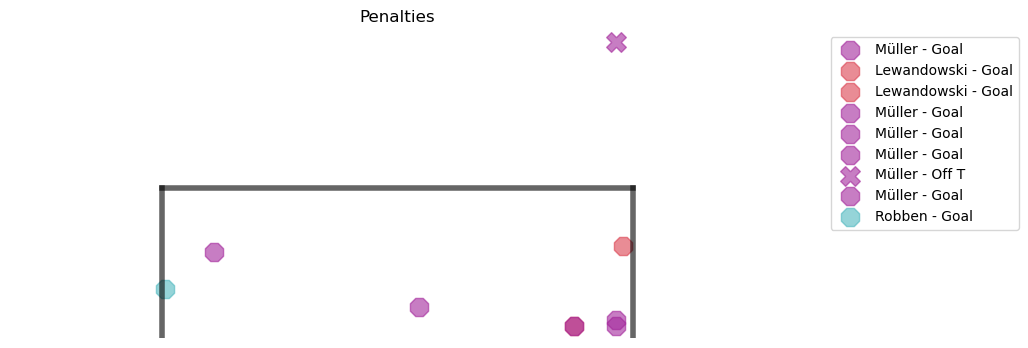

In [141]:
# Create a figure and axis with figsize 10, 4
fig, ax = plt.subplots(figsize=(10, 4))

# Define post coordinates
post_x1 = 43.34
post_y_start1 = 0
post_y_end1 = 2.44

post_x2 = 36.66
post_y_start2 = 0
post_y_end2 = 2.44

# New post coordinates
new_post_y = 2.44
new_post_x_start = 36.66
new_post_x_end = 43.34

# Plot the posts
ax.plot([post_x2, post_x2], [post_y_start2, post_y_end2], color='black', linewidth=4, alpha=0.6)
ax.plot([post_x1, post_x1], [post_y_start1, post_y_end1], color='black', linewidth=4, alpha=0.6)
ax.plot([new_post_x_start, new_post_x_end], [new_post_y, new_post_y], color='black', linewidth=4, alpha=0.6)  # New post

# Iterate over the rows in the dataframe
for index, row in penalty_location.iterrows():
    x_end = row['x_end']
    y_end = row['y_end']
    player = row['player']
    shot_outcome = row['shot_outcome']

    # Define color, alpha, and marker based on player and outcome
    color = '#a3279b' if player == 'Müller' else ('#db404f' if player == 'Lewandowski' else '#4eb8bf')
    alpha = 0.6
    marker = '8' if shot_outcome == 'Goal' else 'X'

    # Scatter plot the shots
    ax.scatter(x_end, y_end, color=color, marker=marker, label=f'{player} - {shot_outcome}', alpha=alpha, s=200)

# Set plot limits and labels
ax.set_xlim(34.5, 45.5)  # Inverted x-axis limits
ax.set_ylim(0, 5)
#ax.set_xlabel('X Coordinate')
#ax.set_ylabel('Height (meters)')
ax.set_title('Penalties')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide axes
ax.axis(False)

# Save and display the plot
plt.savefig('Penalties.png', format='png', dpi=300)
plt.show()


## Corners

In [197]:
corner_df=all_events_df[all_events_df.pass_type=='Corner']

In [198]:
corner=corner_df[['player', 'pass_recipient','location','pass_end_location', 'pass_outcome']]
corners=corner
corners[['x','y']]=corners.location.apply(pd.Series)
corners[['x_end','y_end']]=corners.pass_end_location.apply(pd.Series)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\1026001342.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\1026001342.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\1026001342.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [199]:
takers=corner.player.value_counts()
takers=pd.DataFrame(takers)
takers.style.background_gradient(cmap='RdYlGn')
corner_takers=takers.style.background_gradient(cmap='RdYlGn')

corner_takers.export_png('corner takers.png')
corner_takers

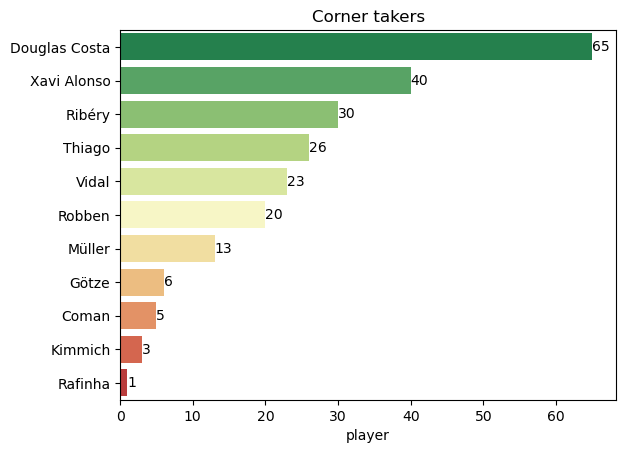

In [200]:
sns.barplot(x=takers.player,y=takers.index,palette='RdYlGn_r')
for index, value in enumerate(takers.player):
    plt.text(value, index, str(value), va='center')  

plt.title('Corner takers')
plt.savefig('Corner_takers.png', format='png', dpi=200)

In [201]:
receivers=corner.pass_recipient.value_counts()
receivers=pd.DataFrame(receivers)
receivers.style.background_gradient(cmap='RdYlGn')

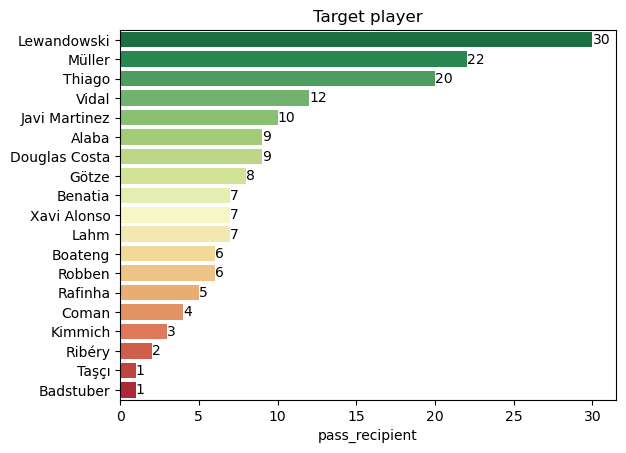

In [202]:
sns.barplot(x=receivers.pass_recipient,y=receivers.index,palette='RdYlGn_r')
for index, value in enumerate(receivers.pass_recipient):
    plt.text(value, index, str(value), va='center')  

plt.title('Target player')
plt.savefig('Target player.png', format='png', dpi=200)

In [203]:
target_players=receivers.index.unique()
target_players

Index(['Lewandowski', 'Müller', 'Thiago', 'Vidal', 'Javi Martinez', 'Alaba',
       'Douglas Costa', 'Götze', 'Benatia', 'Xavi Alonso', 'Lahm', 'Boateng',
       'Robben', 'Rafinha', 'Coman', 'Kimmich', 'Ribéry', 'Taşçı',
       'Badstuber'],
      dtype='object')

In [204]:
corner[['x','y']]=corner.location.apply(pd.Series)
corner[['x_end','y_end']]=corner.pass_end_location.apply(pd.Series)
corner=corner[['player','pass_recipient','pass_outcome','x','y','x_end','y_end']]
corner

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\3215373513.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\3215373513.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



player pass_recipient pass_outcome      x     y  x_end  y_end
134            Thiago            NaN          Out  120.0   0.1  107.6   80.0
186            Ribéry         Thiago          NaN  120.0   0.1  115.8    4.8
373            Thiago  Javi Martinez          NaN  120.0   0.1  112.3   36.6
547            Ribéry    Lewandowski          NaN  120.0  80.0  109.6   46.5
719            Müller           Lahm          NaN  120.0  80.0   89.3   68.8
...               ...            ...          ...    ...   ...    ...    ...
125333    Xavi Alonso        Boateng          NaN  120.0   0.1  115.0   43.3
125362  Douglas Costa          Vidal          Out  120.0   0.1  107.4   79.7
125622         Robben        Boateng          NaN  120.0  80.0  111.2   23.5
125697         Robben        Boateng   Incomplete  120.0  80.0  116.9   46.1
125846         Müller         Thiago          NaN  120.0  80.0  111.3   78.3

[232 rows x 7 columns]

In [205]:
corner_s=corner[corner.pass_outcome.isna()]
corner_ns=corner[~corner.pass_outcome.isna()]
corner_ns

player pass_recipient pass_outcome      x     y  x_end  y_end
134            Thiago            NaN          Out  120.0   0.1  107.6   80.0
3672    Douglas Costa    Lewandowski   Incomplete  120.0   0.1  108.8   37.1
3919      Xavi Alonso         Müller   Incomplete  120.0  80.0  107.9   36.9
4292      Xavi Alonso         Müller      Unknown  120.0  80.0  110.6   48.7
4597           Thiago    Xavi Alonso   Incomplete  120.0   0.1  116.5   40.5
...               ...            ...          ...    ...   ...    ...    ...
122297  Douglas Costa            NaN   Incomplete  120.0   0.1  116.6   19.8
122584    Xavi Alonso            NaN          Out  120.0   0.1  120.0   74.1
125332  Douglas Costa            NaN   Incomplete  120.0   0.1  114.5   33.1
125362  Douglas Costa          Vidal          Out  120.0   0.1  107.4   79.7
125697         Robben        Boateng   Incomplete  120.0  80.0  116.9   46.1

[109 rows x 7 columns]

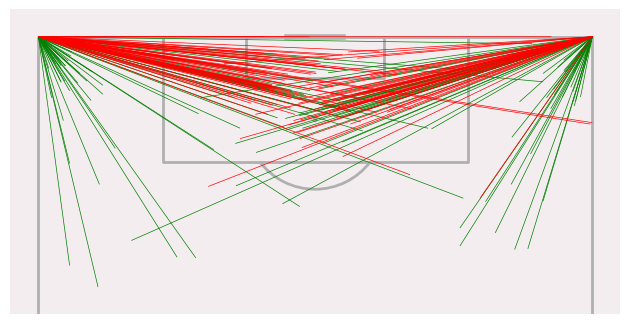

In [206]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0',
                      half=True, pad_bottom=-20)
fig,ax=pitch.draw()

lines=pitch.lines(xstart=corner_s.x, ystart=corner_s.y,
                     xend=corner_s.x_end, yend=corner_s.y_end, ax=ax,
                linewidth=.5, color='green')

lines2=pitch.lines(xstart=corner_ns.x, ystart=corner_ns.y,
                     xend=corner_ns.x_end, yend=corner_ns.y_end, ax=ax,
                linewidth=0.5, color='red')

In [207]:
def update_side(row):
    if row['y'] == 80.0:
        return 'Right Corner'
    else:
        return 'Left Corner'

corners['side'] = corner.apply(update_side, axis=1)
corners

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\2439757207.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



player pass_recipient       location pass_end_location  \
134            Thiago            NaN   [120.0, 0.1]     [107.6, 80.0]   
186            Ribéry         Thiago   [120.0, 0.1]      [115.8, 4.8]   
373            Thiago  Javi Martinez   [120.0, 0.1]     [112.3, 36.6]   
547            Ribéry    Lewandowski  [120.0, 80.0]     [109.6, 46.5]   
719            Müller           Lahm  [120.0, 80.0]      [89.3, 68.8]   
...               ...            ...            ...               ...   
125333    Xavi Alonso        Boateng   [120.0, 0.1]     [115.0, 43.3]   
125362  Douglas Costa          Vidal   [120.0, 0.1]     [107.4, 79.7]   
125622         Robben        Boateng  [120.0, 80.0]     [111.2, 23.5]   
125697         Robben        Boateng  [120.0, 80.0]     [116.9, 46.1]   
125846         Müller         Thiago  [120.0, 80.0]     [111.3, 78.3]   

       pass_outcome      x     y  x_end  y_end          side  
134             Out  120.0   0.1  107.6   80.0   Left Corner  
186             NaN  120.0   0.1  115.8    4.8   Left Corner  
373             NaN  120.0   0.1  112.3   36.6   Left Corner  
547             NaN  120.0  80.0  109.6   46.5  Right Corner  
719             NaN  120.0  80.0   89.3   68.8  Right Corner  
...             ...    ...   ...    ...    ...           ...  
125333          NaN  120.0   0.1  115.0   43.3   Left Corner  
125362          Out  120.0   0.1  107.4   79.7   Left Corner  
125622          NaN  120.0  80.0  111.2   23.5  Right Corner  
125697   Incomplete  120.0  80.0  116.9   46.1  Right Corner  
125846          NaN  120.0  80.0  111.3   78.3  Right Corner  

[232 rows x 10 columns]

In [213]:
corners

player pass_recipient       location pass_end_location  \
134            Thiago            NaN   [120.0, 0.1]     [107.6, 80.0]   
186            Ribéry         Thiago   [120.0, 0.1]      [115.8, 4.8]   
373            Thiago  Javi Martinez   [120.0, 0.1]     [112.3, 36.6]   
547            Ribéry    Lewandowski  [120.0, 80.0]     [109.6, 46.5]   
719            Müller           Lahm  [120.0, 80.0]      [89.3, 68.8]   
...               ...            ...            ...               ...   
125333    Xavi Alonso        Boateng   [120.0, 0.1]     [115.0, 43.3]   
125362  Douglas Costa          Vidal   [120.0, 0.1]     [107.4, 79.7]   
125622         Robben        Boateng  [120.0, 80.0]     [111.2, 23.5]   
125697         Robben        Boateng  [120.0, 80.0]     [116.9, 46.1]   
125846         Müller         Thiago  [120.0, 80.0]     [111.3, 78.3]   

       pass_outcome      x     y  x_end  y_end          side  
134             Out  120.0   0.1  107.6   80.0   Left Corner  
186             NaN  120.0   0.1  115.8    4.8   Left Corner  
373             NaN  120.0   0.1  112.3   36.6   Left Corner  
547             NaN  120.0  80.0  109.6   46.5  Right Corner  
719             NaN  120.0  80.0   89.3   68.8  Right Corner  
...             ...    ...   ...    ...    ...           ...  
125333          NaN  120.0   0.1  115.0   43.3   Left Corner  
125362          Out  120.0   0.1  107.4   79.7   Left Corner  
125622          NaN  120.0  80.0  111.2   23.5  Right Corner  
125697   Incomplete  120.0  80.0  116.9   46.1  Right Corner  
125846          NaN  120.0  80.0  111.3   78.3  Right Corner  

[232 rows x 10 columns]

In [208]:
corner_list=corners.side.unique()
corner_list

array(['Left Corner', 'Right Corner'], dtype=object)

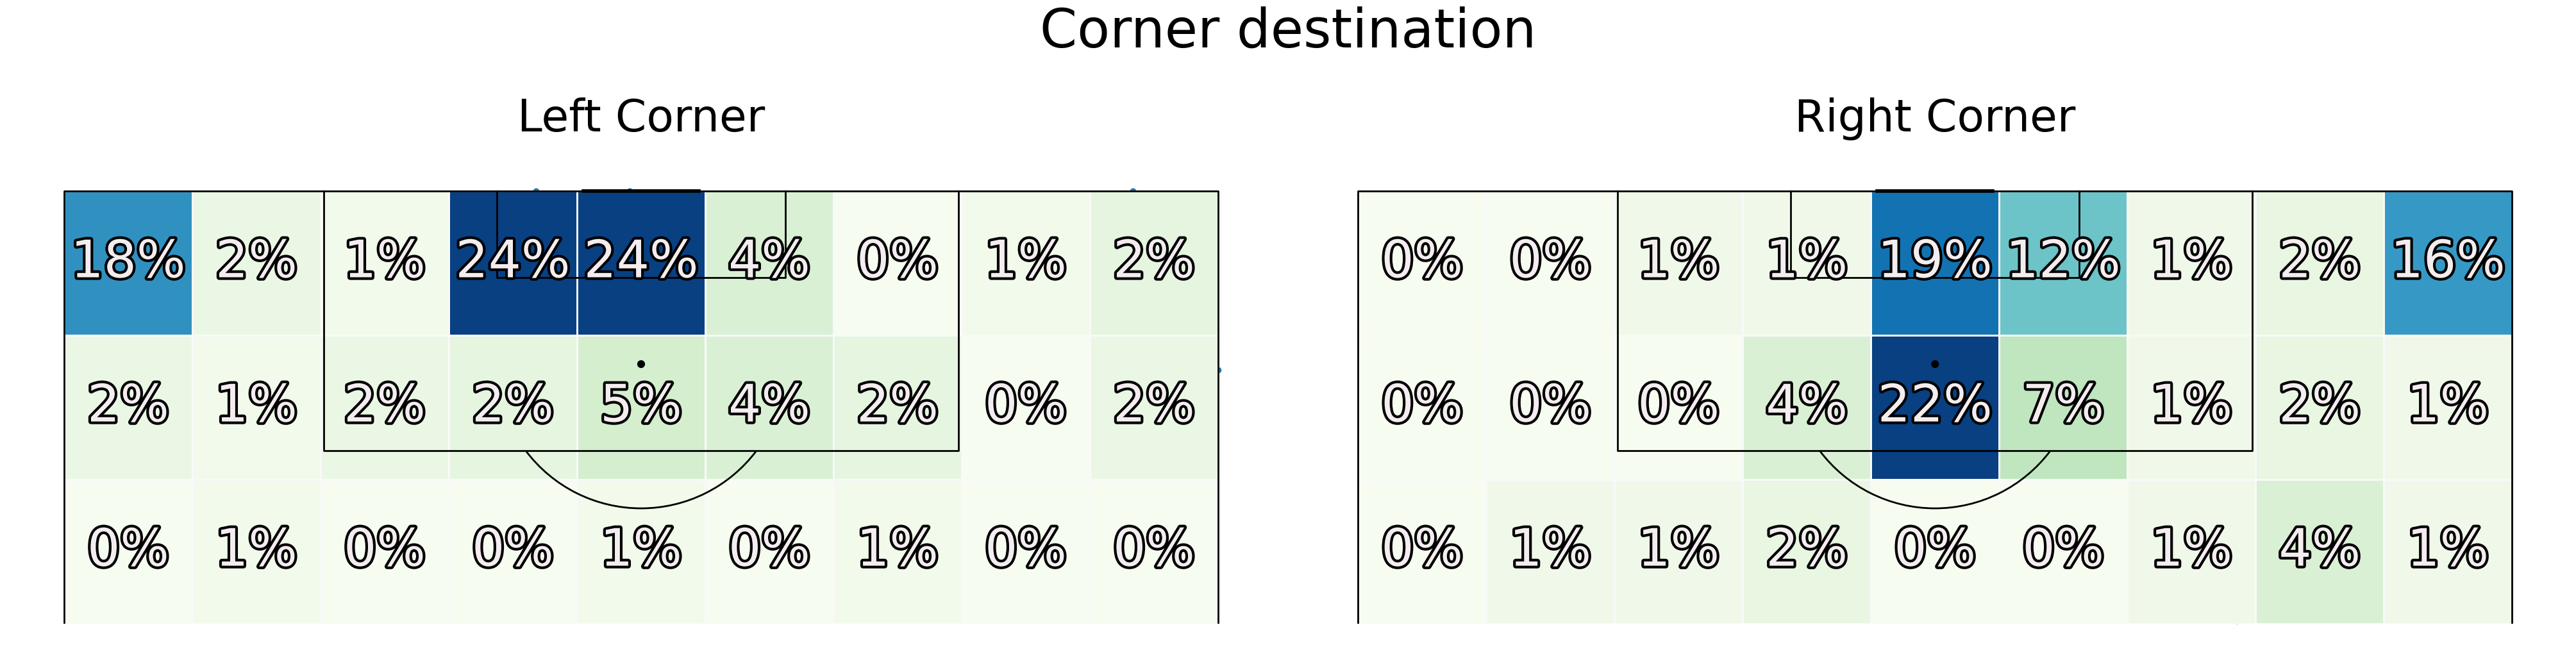

In [209]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, line_zorder=2, line_color='black', pad_bottom=-30)
fig, axs = pitch.grid(ncols = 2, nrows = 1, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

axs['title'].text(0.5,3, "Corner destination", ha='center', va='top', fontsize=60)

for name, ax in zip(corner_list, axs['pitch'].flat[:len(corner_list)]):

    
    corner_df = corners[corners['side'] == name]  # Filter DataFrame based on corner name
    x = corner_df['x_end']
    y = corner_df['y_end']

   
    plot = pitch.scatter(x, y, ax=ax)
    bin_statistic = pitch.bin_statistic(x, y, statistic='count', bins=(12, 9), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, cmap='GnBu', edgecolor='#f9f9f9')

    labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=58,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=[path_effects.Stroke(linewidth=6, foreground='black'),
                              path_effects.Normal()])
    ax.text(40, 125, name,
            ha='center', va='center', fontsize=50)


plt.savefig('Corner destination.png', format='png', dpi=300)

In [259]:
corners=corners[['pass_recipient','x_end','y_end','side']]
left_corner=corners[corners.side=='Left Corner']
right_corner=corners[corners.side=='Right Corner']

In [268]:
avg_locationrcorner=right_corner.groupby('pass_recipient').agg({'x_end':['mean'],'y_end':['mean']})
avg_locationrcorner.columns=['x','y']
avg_locationrcorner=avg_locationrcorner.reset_index()

avg_locationlcorner=left_corner.groupby('pass_recipient').agg({'x_end':['mean'],'y_end':['mean']})
avg_locationlcorner.columns=['x','y']
avg_locationlcorner=avg_locationlcorner.reset_index()
avg_locationrcorner

pass_recipient           x          y
0           Alaba   98.783333  37.300000
1       Badstuber  110.400000  37.600000
2         Benatia  111.250000  41.733333
3         Boateng  114.733333  32.166667
4           Coman  111.433333  45.633333
5   Douglas Costa  107.850000  73.125000
6           Götze  111.666667  70.466667
7   Javi Martinez  109.650000  42.000000
8         Kimmich  116.600000  75.900000
9            Lahm   93.033333  66.416667
10    Lewandowski  108.077778  39.211111
11         Müller  109.170000  43.090000
12        Rafinha   96.200000  64.600000
13         Ribéry  103.250000  56.250000
14         Robben  110.500000  64.750000
15          Taşçı  108.400000  43.800000
16         Thiago  113.000000  70.733333
17          Vidal  110.200000  53.100000
18    Xavi Alonso  110.660000  68.320000

In [273]:
lcorner_player=avg_locationlcorner.pass_recipient.unique()
rcorner_player=avg_locationrcorner.pass_recipient.unique()


C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\1421795462.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



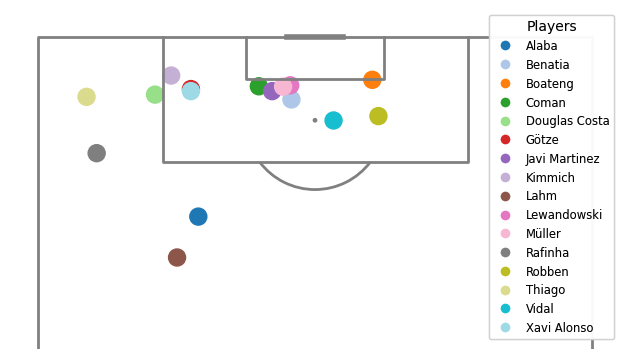

In [277]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, line_zorder=2, line_color='grey', pad_bottom=-15)
fig,ax=pitch.draw()

# Generate a colormap with unique colors for each player
unique_players = avg_locationlcorner['pass_recipient'].unique()
num_players = len(unique_players)
colors = plt.cm.get_cmap('tab20', num_players)

# Plot the scatter points
scatter = pitch.scatter(x=avg_locationlcorner.x, y=avg_locationlcorner.y, ax=ax, s=150, color=colors(np.arange(num_players)))

# Create a legend with player colors and names
legend = plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=player) for color, player in zip(colors(range(num_players)), unique_players)],
                    title='Players', loc='upper right', fontsize='small')

# Add the legend to the plot
ax.add_artist(legend)

plt.savefig('Corner destination.png', format='png', dpi=300)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_19056\558047122.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



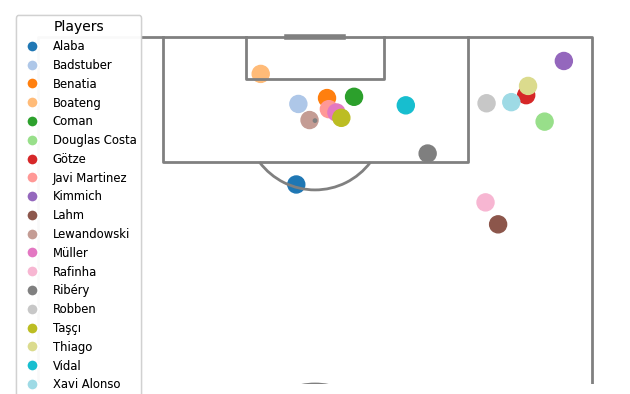

In [279]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, line_zorder=2, line_color='grey', pad_bottom=-10)
fig,ax=pitch.draw()

# Generate a colormap with unique colors for each player
unique_players = avg_locationrcorner['pass_recipient'].unique()
num_players = len(rcorner_player)
colors = plt.cm.get_cmap('tab20', num_players)

# Plot the scatter points
scatter = pitch.scatter(x=avg_locationrcorner.x, y=avg_locationrcorner.y, ax=ax, s=150, color=colors(np.arange(num_players)))

# Create a legend with player colors and names
legend = plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=player) for color, player in zip(colors(range(num_players)), unique_players)],
                    title='Players', loc='upper left', fontsize='small')

# Add the legend to the plot
ax.add_artist(legend)

plt.savefig('Corner destination.png', format='png', dpi=300)